In [1]:
#load Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
     


# Data Pre-processing

In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Checkout\Downloads\kickstarter_data_with_features.csv')

df.head()
     

,Unnamed: 0,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,...,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch,launch_to_deadline,launch_to_state_change
0,0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,...,29,2014,22,12,17,2014,13,17 days 14:51:39.000000000,36 days 20:47:24.000000000,NaN
1,1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,...,20,2015,9,3,2,2015,16,10 days 06:44:39.000000000,60 days 00:00:00.000000000,NaN
2,2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,...,24,2015,0,1,25,2015,8,1 days 08:08:58.000000000,60 days 00:00:00.000000000,NaN
3,3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,...,5,2014,22,9,6,2014,0,0 days 02:11:17.000000000,30 days 00:00:00.000000000,NaN
4,4,1613604977,"{""small"":""https://ksr-ugc.imgix.net/assets/012...","Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,...,25,2016,14,5,26,2016,5,0 days 15:47:38.000000000,32 days 06:02:33.000000000,NaN


In [3]:
df.shape


(20632, 60)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                20632 non-null  int64  
 1   id                        20632 non-null  int64  
 2   photo                     20632 non-null  object 
 3   name                      20632 non-null  object 
 4   blurb                     20627 non-null  object 
 5   goal                      20632 non-null  float64
 6   pledged                   20632 non-null  float64
 7   state                     20632 non-null  object 
 8   slug                      20632 non-null  object 
 9   disable_communication     20632 non-null  bool   
 10  country                   20632 non-null  object 
 11  currency                  20632 non-null  object 
 12  currency_symbol           20632 non-null  object 
 13  currency_trailing_code    20632 non-null  bool   
 14  deadli

In [5]:
df.describe()


,Unnamed: 0,id,goal,pledged,backers_count,static_usd_rate,usd_pledged,name_len,name_len_clean,blurb_len,...,state_changed_at_yr,state_changed_at_hr,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr
count,20632.000000,2.063200e+04,2.063200e+04,2.063200e+04,20632.000000,20632.000000,2.063200e+04,20627.000000,20627.000000,20627.000000,...,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000
mean,10315.500000,1.071156e+09,9.410497e+04,2.139268e+04,183.675843,1.039363,2.091591e+04,5.940806,5.292578,18.991177,...,2014.824932,12.855855,6.473633,15.542652,2014.620105,12.673371,6.541828,15.322363,2014.752084,12.417168
std,5956.089713,6.154929e+08,1.335511e+06,1.204973e+05,1222.012658,0.230419,1.154717e+05,2.826118,2.418168,4.632371,...,1.267553,6.023725,3.345992,8.776659,1.273937,5.947005,3.379879,8.800871,1.261752,5.574409
min,0.000000,1.645550e+05,1.000000e+00,0.000000e+00,0.000000,0.045641,0.000000e+00,1.000000,1.000000,1.000000,...,2009.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,1.000000,1.000000,2009.000000,0.000000
25%,5157.750000,5.472185e+08,4.000000e+03,2.500000e+01,2.000000,1.000000,2.500000e+01,4.000000,3.000000,17.000000,...,2014.000000,9.000000,4.000000,8.000000,2014.000000,9.000000,4.000000,8.000000,2014.000000,9.000000
50%,10315.500000,1.069882e+09,1.400000e+04,6.950000e+02,12.000000,1.000000,7.163012e+02,6.000000,5.000000,20.000000,...,2015.000000,13.000000,7.000000,15.000000,2015.000000,13.000000,7.000000,15.000000,2015.000000,12.000000
75%,15473.250000,1.601801e+09,5.000000e+04,5.954250e+03,63.000000,1.000000,6.004628e+03,8.000000,7.000000,22.000000,...,2016.000000,17.000000,9.000000,23.000000,2016.000000,17.000000,9.000000,23.000000,2016.000000,16.000000
max,20631.000000,2.147388e+09,1.000000e+08,6.225355e+06,105857.000000,1.715913,6.225355e+06,16.000000,14.000000,35.000000,...,2017.000000,23.000000,12.000000,31.000000,2017.000000,23.000000,12.000000,31.000000,2017.000000,23.000000


In [6]:
df.nunique()


Unnamed: 0                  20632
id                          20632
photo                       20632
name                        20610
blurb                       20458
goal                         1204
pledged                      8722
state                           5
slug                        20632
disable_communication           2
country                        21
currency                       13
currency_symbol                 5
currency_trailing_code          2
deadline                    20213
state_changed_at            20238
created_at                  20483
launched_at                 20448
staff_pick                      2
backers_count                1505
static_usd_rate              3136
usd_pledged                 12235
creator                     20522
location                     5178
category                       24
profile                     20632
spotlight                       2
urls                        20632
source_url                     33
friends       

In [7]:
df.isnull().sum()


Unnamed: 0                      0
id                              0
photo                           0
name                            0
blurb                           5
goal                            0
pledged                         0
state                           0
slug                            0
disable_communication           0
country                         0
currency                        0
currency_symbol                 0
currency_trailing_code          0
deadline                        0
state_changed_at                0
created_at                      0
launched_at                     0
staff_pick                      0
backers_count                   0
static_usd_rate                 0
usd_pledged                     0
creator                         0
location                       45
category                     1889
profile                         0
spotlight                       0
urls                            0
source_url                      0
friends       

In [8]:
df.fillna(0, inplace=True)

In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20632 non-null  int64  
 1   photo                     20632 non-null  object 
 2   name                      20632 non-null  object 
 3   blurb                     20632 non-null  object 
 4   goal                      20632 non-null  float64
 5   pledged                   20632 non-null  float64
 6   state                     20632 non-null  object 
 7   slug                      20632 non-null  object 
 8   disable_communication     20632 non-null  bool   
 9   country                   20632 non-null  object 
 10  currency                  20632 non-null  object 
 11  currency_symbol           20632 non-null  object 
 12  currency_trailing_code    20632 non-null  bool   
 13  deadline                  20632 non-null  object 
 14  state_

In [11]:
df.isnull().sum()

id                          0
photo                       0
name                        0
blurb                       0
goal                        0
pledged                     0
state                       0
slug                        0
disable_communication       0
country                     0
currency                    0
currency_symbol             0
currency_trailing_code      0
deadline                    0
state_changed_at            0
created_at                  0
launched_at                 0
staff_pick                  0
backers_count               0
static_usd_rate             0
usd_pledged                 0
creator                     0
location                    0
category                    0
profile                     0
spotlight                   0
urls                        0
source_url                  0
friends                     0
is_starred                  0
is_backing                  0
permissions                 0
name_len                    0
name_len_c

# EDA

This method returns a square matrix where each cell represents the correlation between two variables in the DataFrame. The correlation coefficient can range from -1 to 1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation.

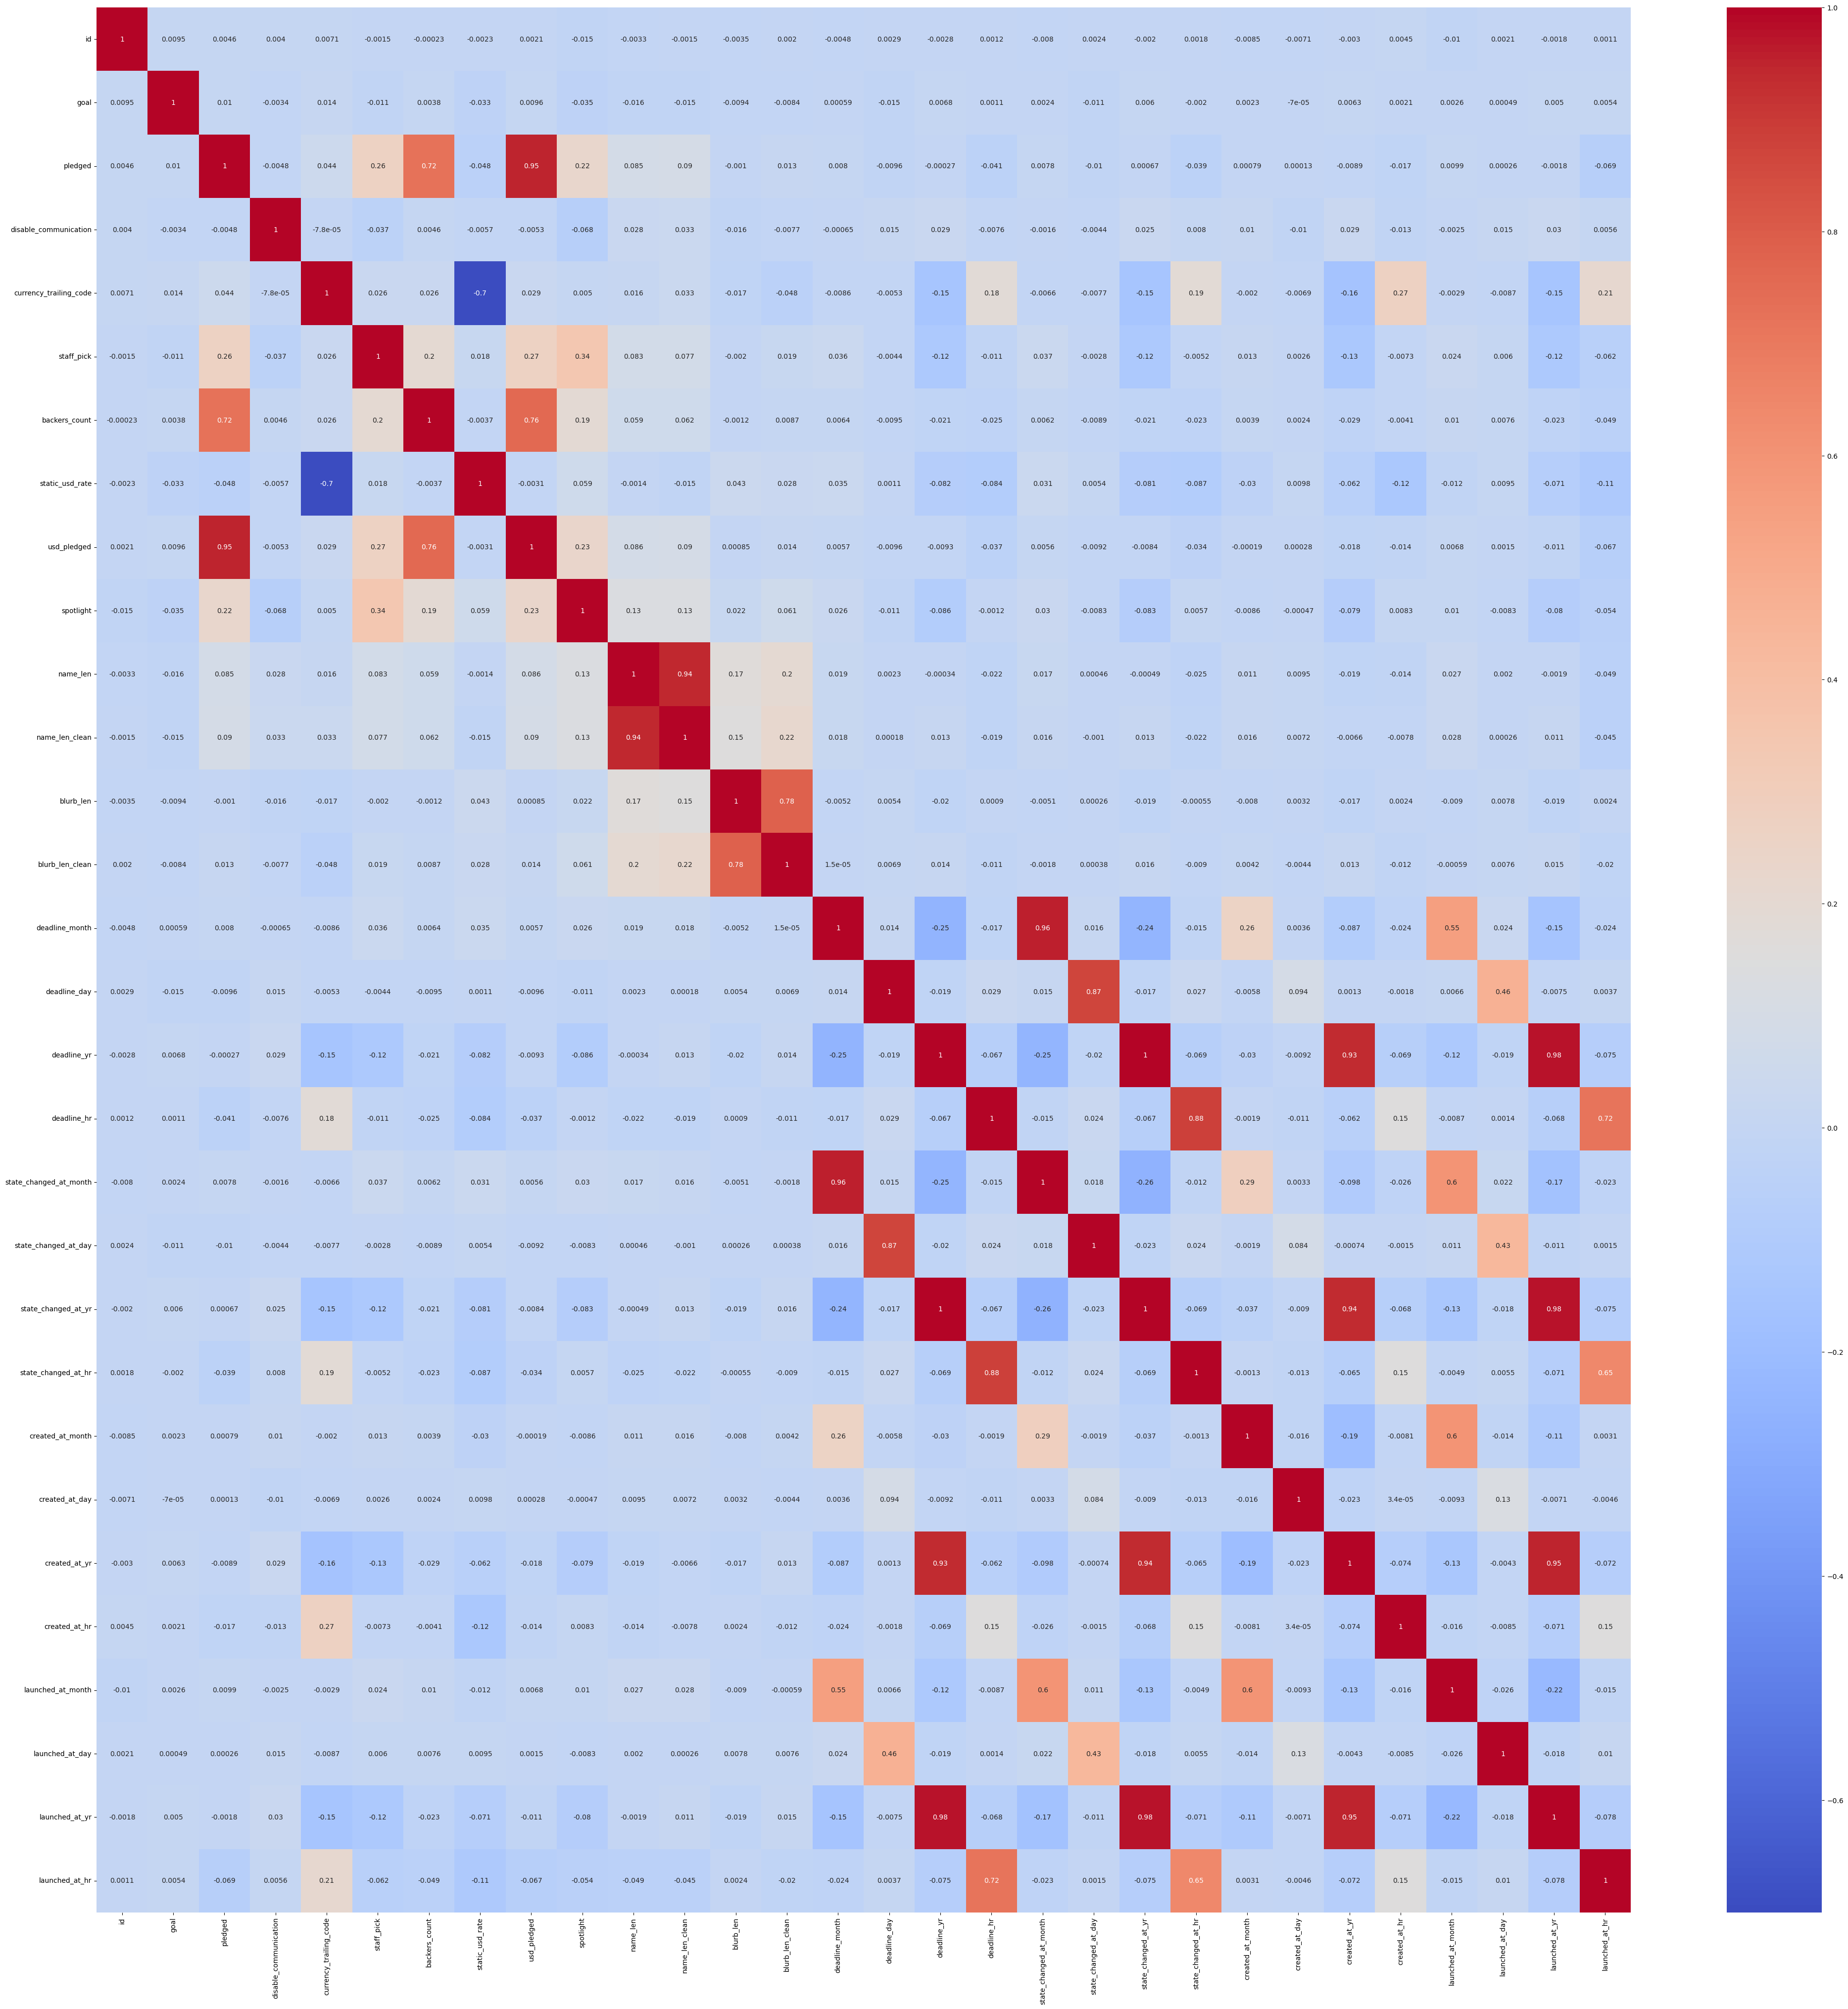

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(50,50))

# Create the heatmap using the 'viridis' colormap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Show the plot
plt.show()


# state

In [13]:
df["state"].value_counts()


failed        11416
successful     6018
canceled       2460
live            508
suspended       230
Name: state, dtype: int64

State Percentile in %: 
failed        55.33
successful    29.17
canceled      11.92
live           2.46
suspended      1.11
Name: state, dtype: float64


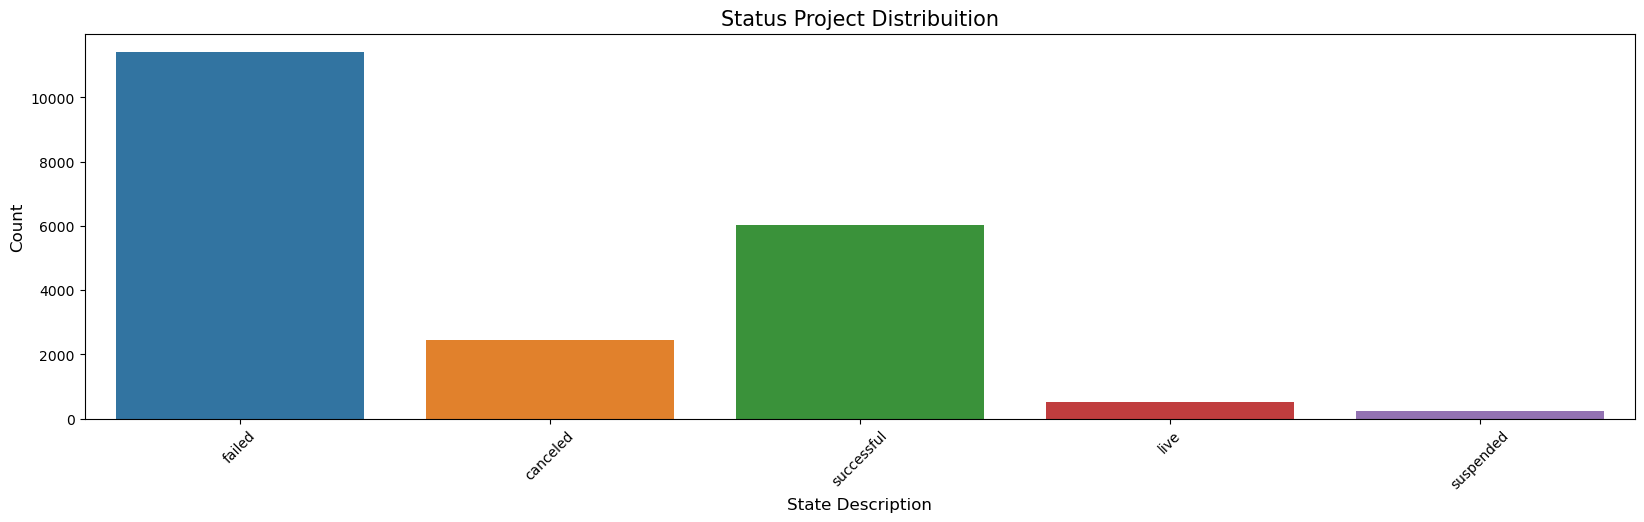

In [14]:
percentile_success = round(df["state"].value_counts() / len(df["state"]) * 100,2)

print("State Percentile in %: ")
print(percentile_success)

plt.figure(figsize = (20,5))

ax1 = sns.countplot(x="state", data=df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_title("Status Project Distribuition", fontsize=15)
ax1.set_xlabel("State Description", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

plt.show()

# Country

country Percentile in %: 
US    68.54
GB    12.11
CA     5.32
AU     3.27
DE     1.83
NL     1.56
FR     1.51
IT     1.18
ES     0.81
DK     0.60
NZ     0.54
SE     0.47
CH     0.46
IE     0.38
NO     0.31
AT     0.31
MX     0.27
BE     0.25
HK     0.17
SG     0.12
LU     0.01
Name: country, dtype: float64


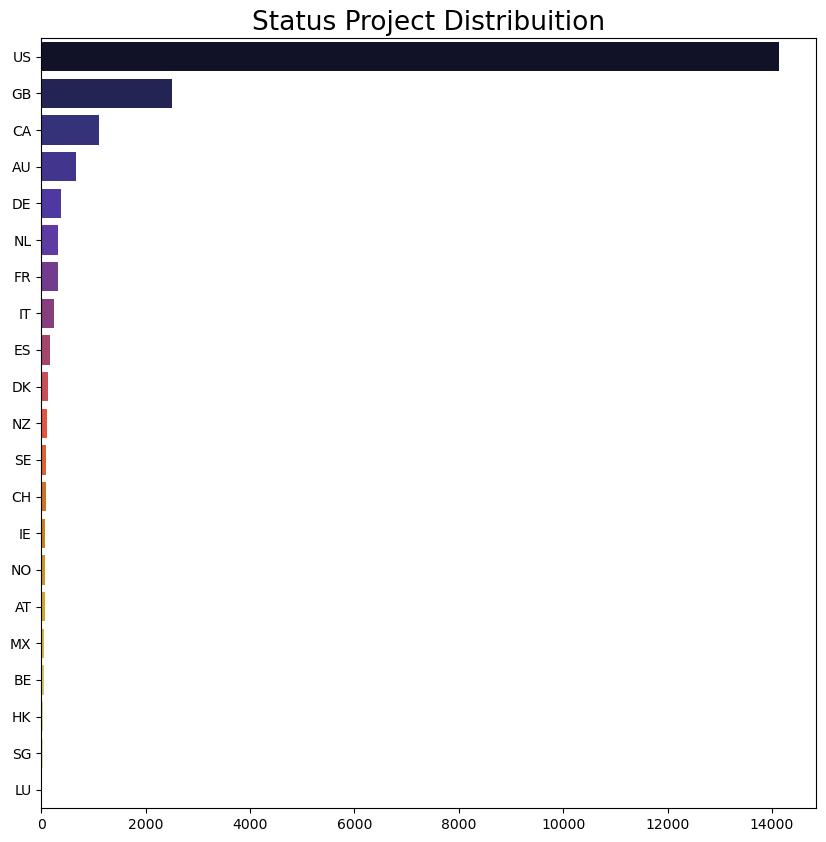

In [15]:
percentile_success = round(df["country"].value_counts() / len(df["country"]) * 100,2)

print("country Percentile in %: ")
print(percentile_success)

top = df["country"].value_counts()
plt.figure(figsize=(10,10))
gv = sns.barplot(y = top.index, x = top.values,data = df, palette = "CMRmap")
plt.title("Status Project Distribuition",fontsize = 19)
plt.show()

# Category

In [16]:
df["category"].value_counts()


Web             3325
Hardware        3248
Software        2631
Gadgets         2336
0               1889
Plays           1184
Apps            1168
Wearables        971
Musical          791
Sound            528
Festivals        482
Robots           473
Flight           373
Experimental     321
Immersive        277
Makerspaces      203
Spaces           182
Places           100
Shorts            40
Thrillers         20
Webseries         20
Restaurants       20
Blues             20
Academic          20
Comedy            10
Name: category, dtype: int64

category Percentile in %: 
Web             16.12
Hardware        15.74
Software        12.75
Gadgets         11.32
0                9.16
Plays            5.74
Apps             5.66
Wearables        4.71
Musical          3.83
Sound            2.56
Festivals        2.34
Robots           2.29
Flight           1.81
Experimental     1.56
Immersive        1.34
Makerspaces      0.98
Spaces           0.88
Places           0.48
Shorts           0.19
Thrillers        0.10
Webseries        0.10
Restaurants      0.10
Blues            0.10
Academic         0.10
Comedy           0.05
Name: category, dtype: float64


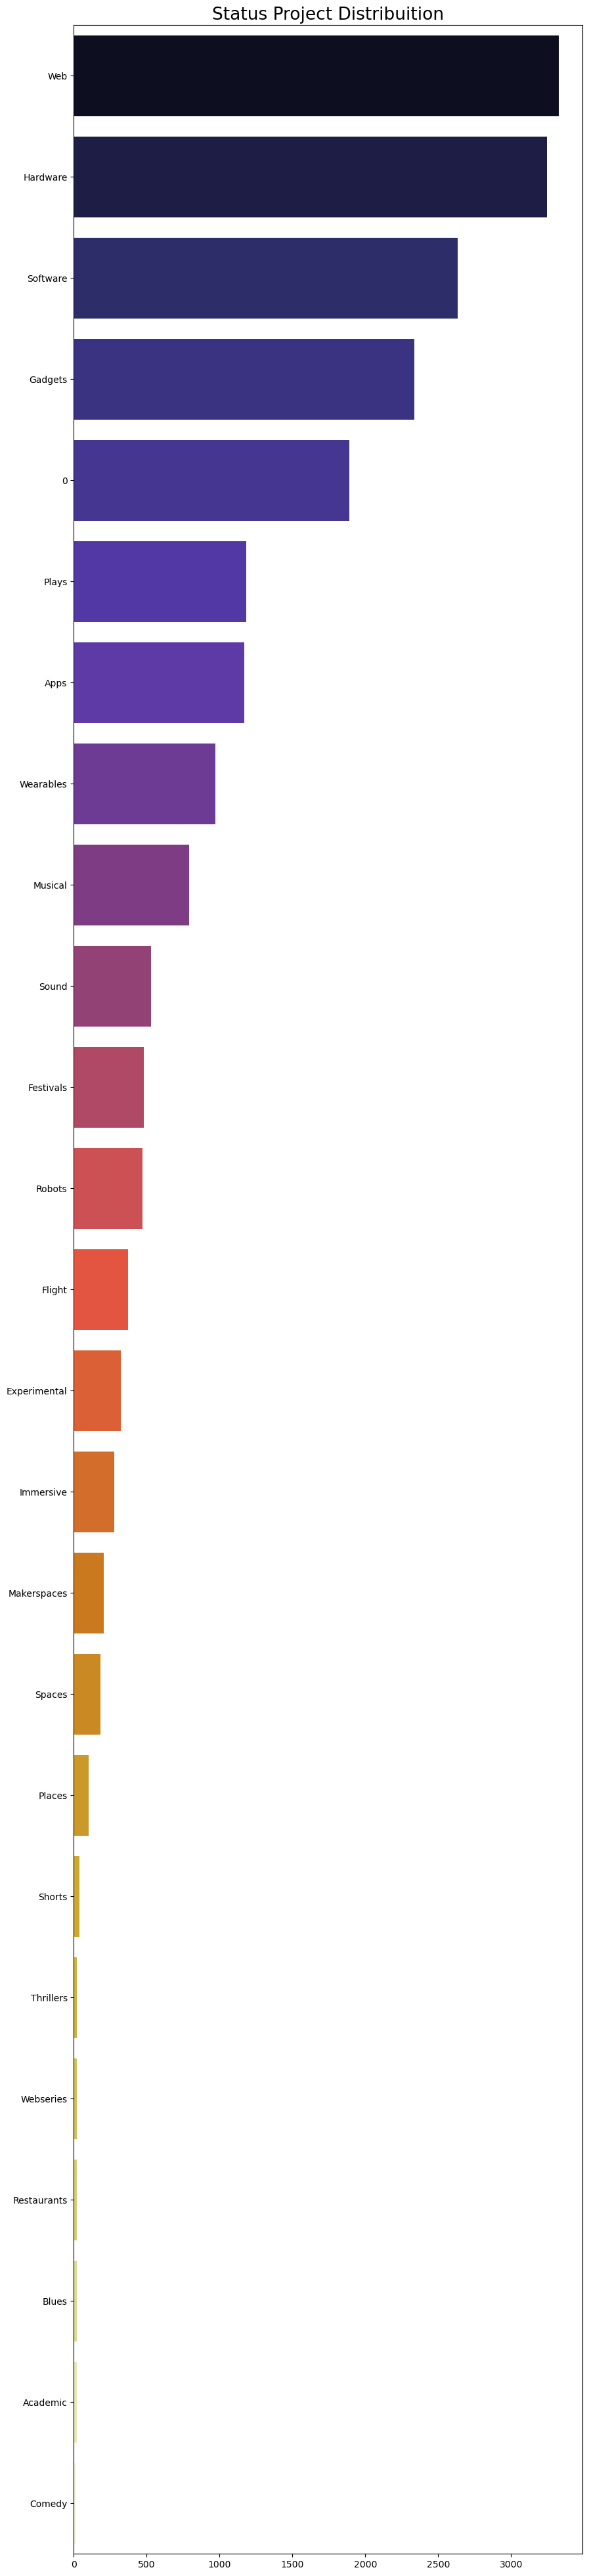

In [17]:
percentile_success = round(df["category"].value_counts() / len(df["category"]) * 100,2)

print("category Percentile in %: ")
print(percentile_success)

top = df["category"].value_counts()
plt.figure(figsize=(10,50))
gv = sns.barplot(y = top.index, x = top.values,data = df, palette = "CMRmap")
plt.title("Status Project Distribuition",fontsize = 19)
plt.show()
     

# Currency

In [18]:
df["currency"].value_counts()


USD    14141
GBP     2498
EUR     1618
CAD     1098
AUD      674
DKK      123
NZD      111
SEK       96
CHF       94
NOK       64
MXN       55
HKD       35
SGD       25
Name: currency, dtype: int64

currency Percentile in %: 
USD    68.54
GBP    12.11
EUR     7.84
CAD     5.32
AUD     3.27
DKK     0.60
NZD     0.54
SEK     0.47
CHF     0.46
NOK     0.31
MXN     0.27
HKD     0.17
SGD     0.12
Name: currency, dtype: float64


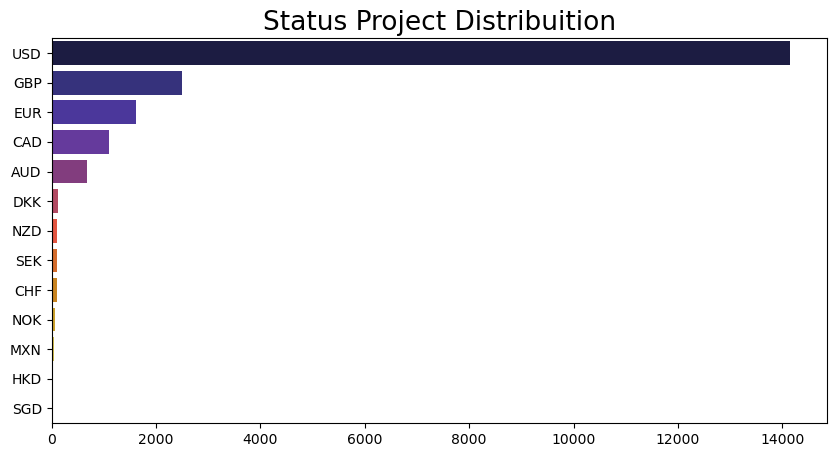

In [19]:
percentile_success = round(df["currency"].value_counts() / len(df["currency"]) * 100,2)

print("currency Percentile in %: ")
print(percentile_success)

top = df["currency"].value_counts()
plt.figure(figsize=(10,5))
gv = sns.barplot(y = top.index, x = top.values,data = df, palette = "CMRmap")
plt.title("Status Project Distribuition",fontsize = 19)
plt.show()
     

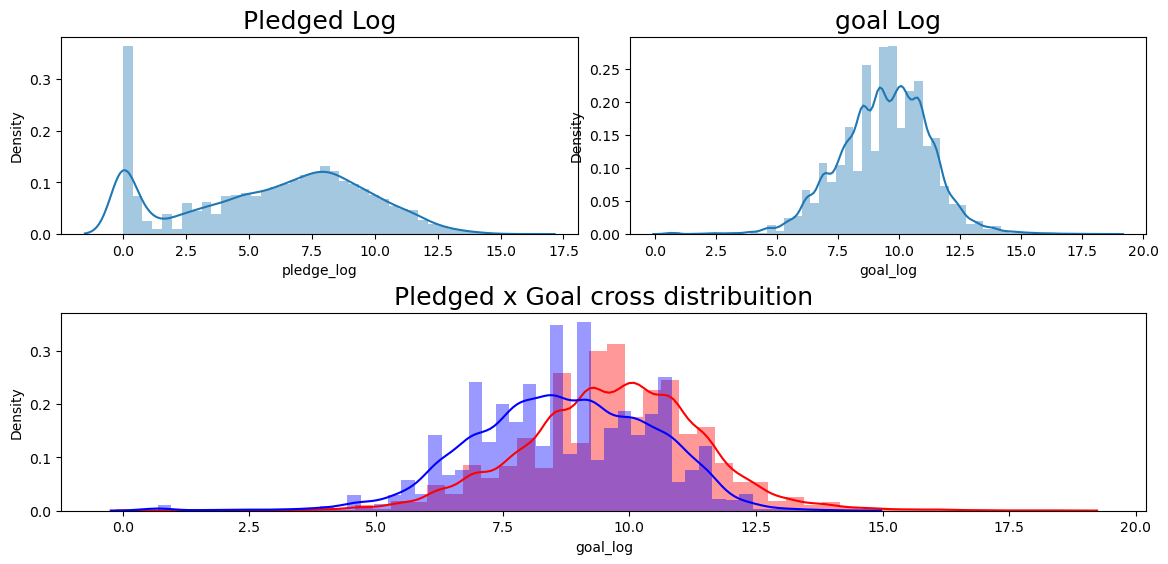

In [20]:
# Normalization to understand the distribuition of the pledge

df["pledge_log"] = np.log(df["pledged"] + 1)
df["goal_log"] = np.log(df["goal"]+ 1)

df_failed = df[df["state"] == "failed"]
df_success = df[df["state"] == "successful"]
df_suspended = df[df["state"] == "suspended"]

plt.figure(figsize = (14,6))
plt.subplot(221)
g = sns.distplot(df["pledge_log"])
g.set_title("Pledged Log", fontsize=18)

plt.subplot(222)
g1 = sns.distplot(df["goal_log"])
g1.set_title("goal Log", fontsize=18)

plt.subplot(212)
g2 = sns.distplot(df_failed['goal_log'], color='r')
g2 = sns.distplot(df_success['goal_log'], color='b')
g2.set_title("Pledged x Goal cross distribuition", fontsize=18)

plt.subplots_adjust(wspace = 0.1, hspace = 0.4,top = 0.9)

plt.show()
     

# Description of Goal and Pledged values

In [21]:

print("Min Goal and Pledged values")
print(df[["goal", "pledged"]].min())
print("")
print("Mean Goal and Pledged values")
print(round(df[["goal", "pledged"]].mean(),2))
print("")
print("Median Goal and Pledged values")
print(df[["goal", "pledged"]].median())
print("")
print("Max Goal and Pledged values")
print(df[["goal", "pledged"]].max())
print("")
print("Std Goal and Pledged values")
print(round(df[["goal", "pledged"]].std(),2))

Min Goal and Pledged values
goal       1.0
pledged    0.0
dtype: float64

Mean Goal and Pledged values
goal       94104.97
pledged    21392.68
dtype: float64

Median Goal and Pledged values
goal       14000.0
pledged      695.0
dtype: float64

Max Goal and Pledged values
goal       1.000000e+08
pledged    6.225355e+06
dtype: float64

Std Goal and Pledged values
goal       1335511.39
pledged     120497.25
dtype: float64


# Understanding of Goal and pleged by its State


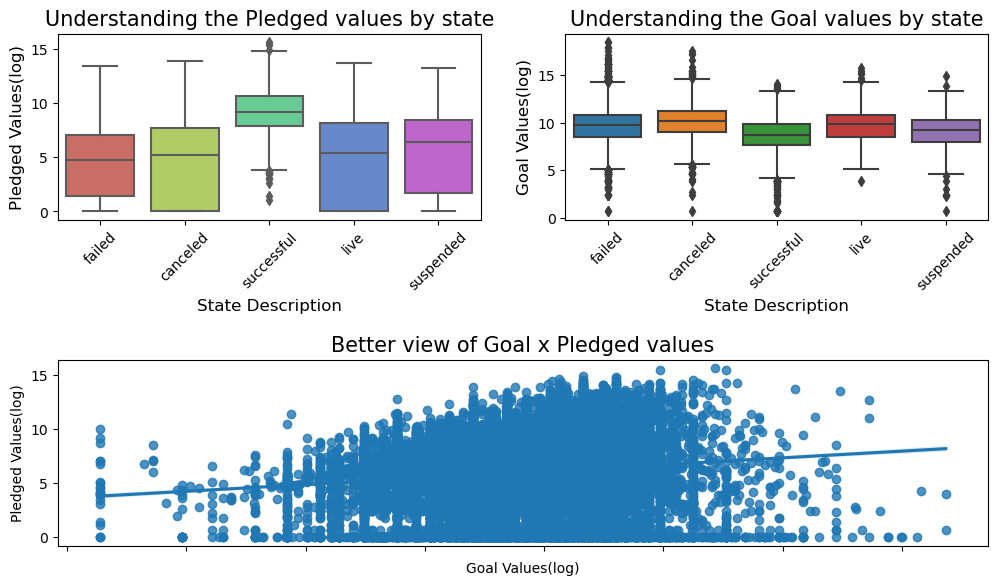

In [22]:
plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.75, top = 0.75)

ax1 = plt.subplot(221)
ax1 = sns.boxplot(x="state", y="pledge_log", data=df, palette="hls")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_title("Understanding the Pledged values by state", fontsize=15)
ax1.set_xlabel("State Description", fontsize=12)
ax1.set_ylabel("Pledged Values(log)", fontsize=12)

ax2 = plt.subplot(222)
ax2 = sns.boxplot(x="state", y="goal_log", data=df)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
ax2.set_title("Understanding the Goal values by state", fontsize=15)
ax2.set_xlabel("State Description", fontsize=12)
ax2.set_ylabel("Goal Values(log)", fontsize=12)

ax0 = plt.subplot(212)
ax0 = sns.regplot(x="goal_log", y="pledge_log", data=df, x_jitter=False)
ax0.set_title("Better view of Goal x Pledged values", fontsize=15)
ax0.set_xlabel("Goal Values(log)")
ax0.set_ylabel("Pledged Values(log)")
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)
plt.show()

# How many category Fail and Succeed?


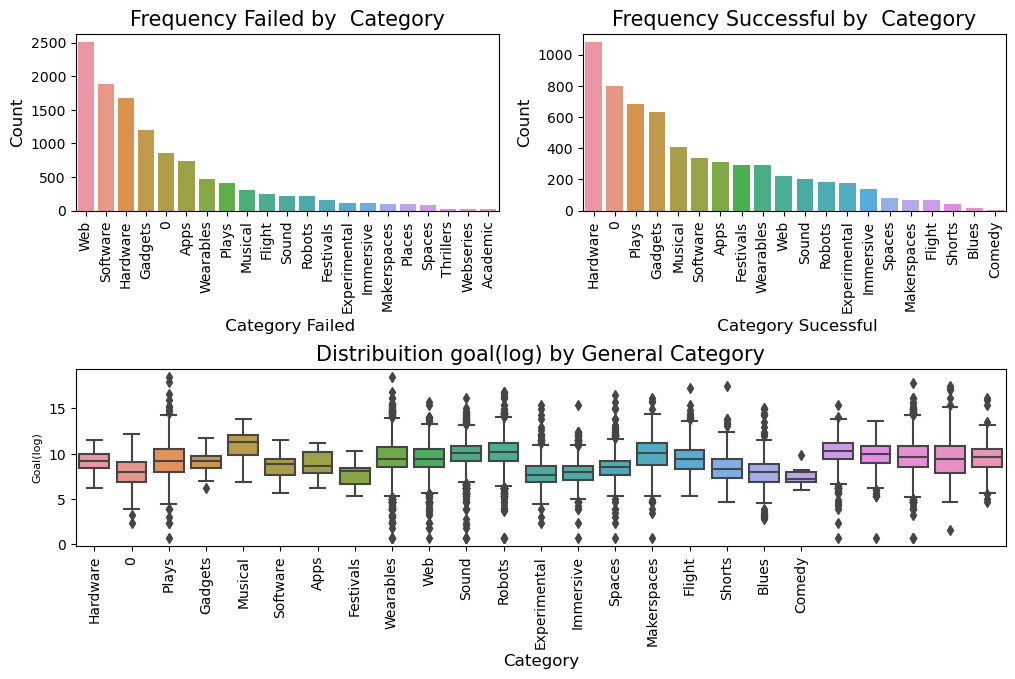

In [23]:
main_cats = df["category"].value_counts()
main_cats_failed = df[df["state"] == "failed"]["category"].value_counts()
main_cats_sucess = df[df["state"] == "successful"]["category"].value_counts()

plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.9, top = 0.75)

ax0 = plt.subplot(221)
ax0 = sns.barplot(x=main_cats_failed.index, y= main_cats_failed.values, orient='v')
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)
ax0.set_title("Frequency Failed by  Category", fontsize=15)
ax0.set_xlabel(" Category Failed", fontsize=12)
ax0.set_ylabel("Count", fontsize=12)

ax1 = plt.subplot(222)
ax1 = sns.barplot(x=main_cats_sucess.index, y = main_cats_sucess.values, orient='v')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title("Frequency Successful by  Category", fontsize=15)
ax1.set_xlabel(" Category Sucessful", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2 = plt.subplot(212)
ax2 = sns.boxplot(x="category", y="goal_log", data=df)
ax2.set_xticks(ax1.get_xticks())
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)
#ax2.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax2.set_title("Distribuition goal(log) by General Category", fontsize=15)
ax2.set_xlabel("Category", fontsize=12)
ax2.set_ylabel("Goal(log)", fontsize=8)
plt.show()

# Look Goal and Pledged Means by State


In [24]:
print("Looking Goal and Pledged Mean by state ")
print(round(df.groupby(["state"])["goal", "pledged"].mean(),2))

Looking Goal and Pledged Mean by state 
                 goal   pledged
state                          
canceled    142866.09   6350.29
failed      122643.42   2777.47
live        100202.36  14948.36
successful   21173.21  63608.15
suspended    50880.77  15898.87


# Distribuition in category values as a success or failure


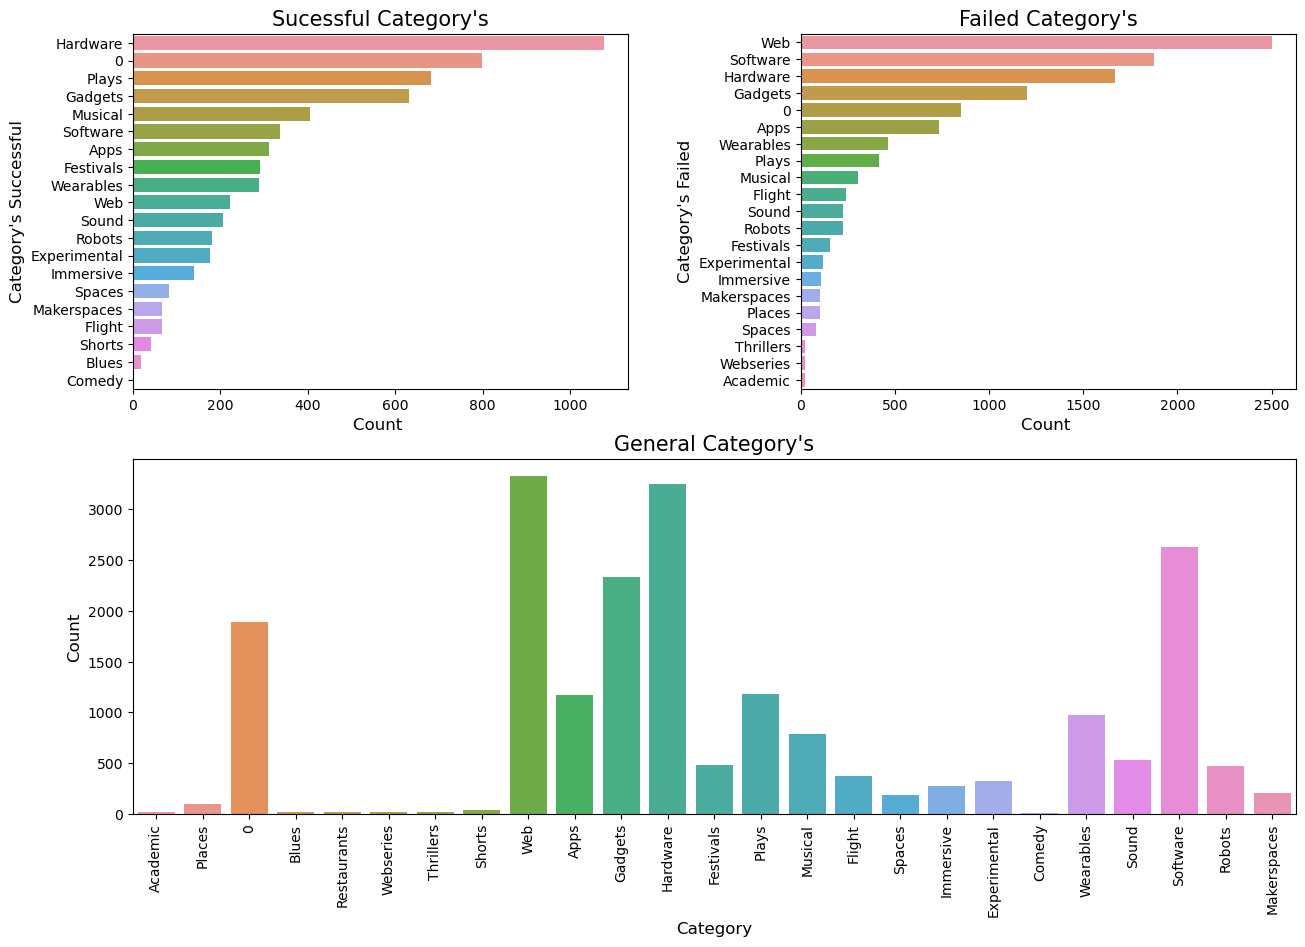

In [25]:
categorys_failed = df[df["state"] == "failed"]["category"].value_counts()[:25]
categorys_sucessful = df[df["state"] == "successful"]["category"].value_counts()[:25]

fig, ax = plt.subplots(ncols=2, figsize=(15,20))
plt.subplots_adjust(wspace = 0.35, top = 0.5)

g1 = plt.subplot(222)
g1 = sns.barplot(x= categorys_failed.values, y=categorys_failed.index, orient='h')
g1.set_title("Failed Category's", fontsize=15)
g1.set_xlabel("Count ", fontsize=12)
g1.set_ylabel("Category's Failed", fontsize=12)

g2 = plt.subplot(221)
g2 = sns.barplot(x= categorys_sucessful.values, y=categorys_sucessful.index, orient='h')
g2.set_title("Sucessful Category's", fontsize=15)
g2.set_xlabel("Count ", fontsize=12)
g2.set_ylabel("Category's Successful", fontsize=12)

ax2 = plt.subplot(212)
ax2 = sns.countplot(x="category", data=df)
ax2.set_xticks(ax2.get_xticks())
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax2.set_title("General Category's", fontsize=15)
ax2.set_xlabel("Category", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

plt.show()


# Date & Time

In [26]:

df['launched_at'] = pd.to_datetime(df['launched_at'])
df['laun_month_year'] = df['launched_at'].dt.to_period("M")
df['laun_year'] = df['launched_at'].dt.to_period("A")

df['deadline'] = pd.to_datetime(df['deadline'])
df['dead_month_year'] = df['deadline'].dt.to_period("M")
df['dead_year'] = df['deadline'].dt.to_period("A")
     

In [27]:
df.laun_month_year = df.laun_month_year.dt.strftime('%Y-%m')
df.laun_year = df.laun_year.dt.strftime('%Y')
     

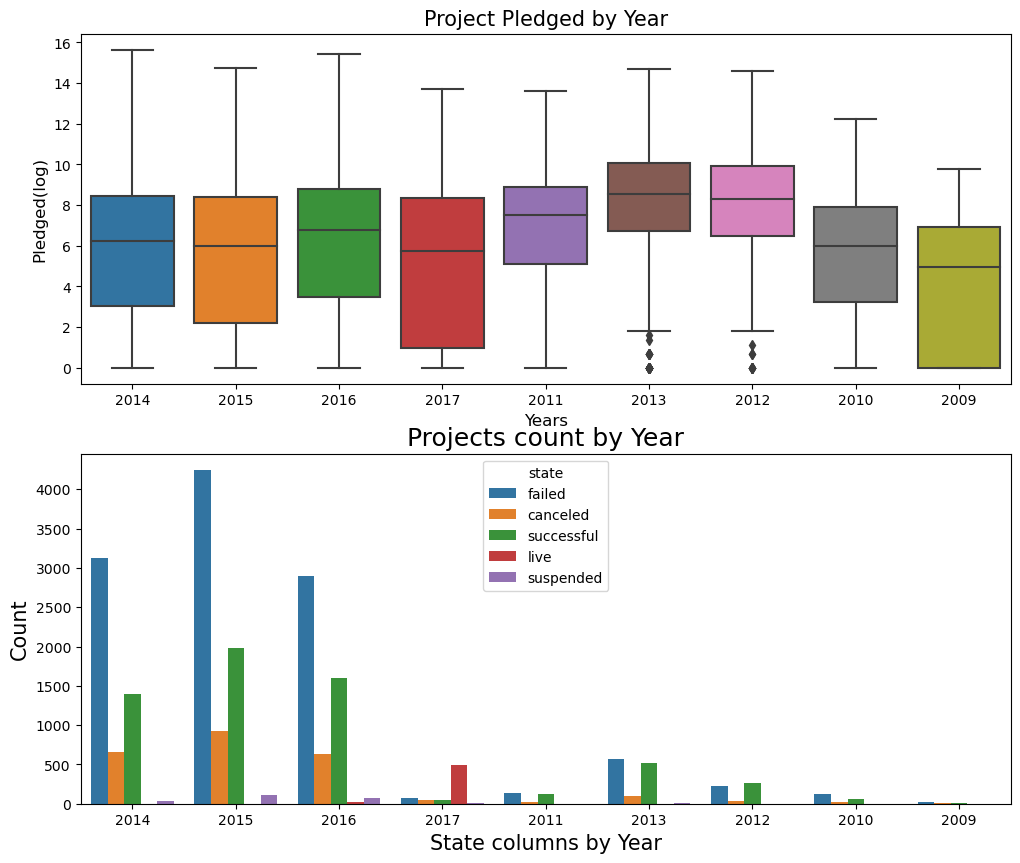

Descriptive status count by year
state      canceled  failed  live  successful  suspended
laun_year                                               
2009              9      26     0          15          0
2010             27     118     0          62          0
2011             26     134     0         125          1
2012             32     227     0         262          2
2013             97     565     0         524          5
2014            660    3132     0        1400         36
2015            928    4241     0        1984        111
2016            637    2894    20        1602         70
2017             44      79   488          44          5


In [28]:
year = df['laun_year'].value_counts()
month = df['laun_month_year'].value_counts()

fig, ax = plt.subplots(2,1, figsize=(12,10))

ax1 = sns.boxplot(x="laun_year", y='pledge_log', data=df, ax=ax[0])
ax1.set_title("Project Pledged by Year", fontsize=15)
ax1.set_xlabel("Years", fontsize=12)
ax1.set_ylabel("Pledged(log)", fontsize=12)

ax2 = sns.countplot(x="laun_year", hue='state', data=df, ax=ax[1])
ax2.set_title("Projects count by Year", fontsize=18)
ax2.set_xlabel("State columns by Year", fontsize=15)
ax2.set_ylabel("Count", fontsize=15)

plt.show()

print("Descriptive status count by year")
print(pd.crosstab(df.laun_year, df.state))
     

# Creating a new feature to calculate percentage of pledged / goal


In [29]:
df['diff_pleded_goal'] = round(df['pledge_log'] / df['goal_log'] * 100,2)
df['diff_pleded_goal'] = df['diff_pleded_goal'].astype(float)
     

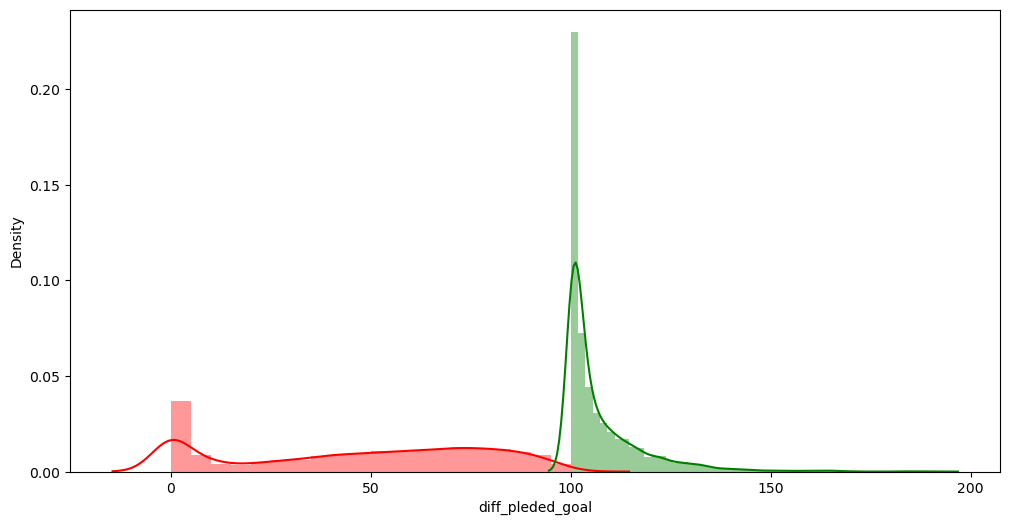

In [30]:
plt.figure(figsize = (12,6))
sns.distplot(df[(df['diff_pleded_goal'] < 200) & (df['state'] == 'failed')]['diff_pleded_goal'], color='r')
sns.distplot(df[(df['diff_pleded_goal'] < 200) & (df['state'] == 'successful')]['diff_pleded_goal'],color='g')
plt.show()

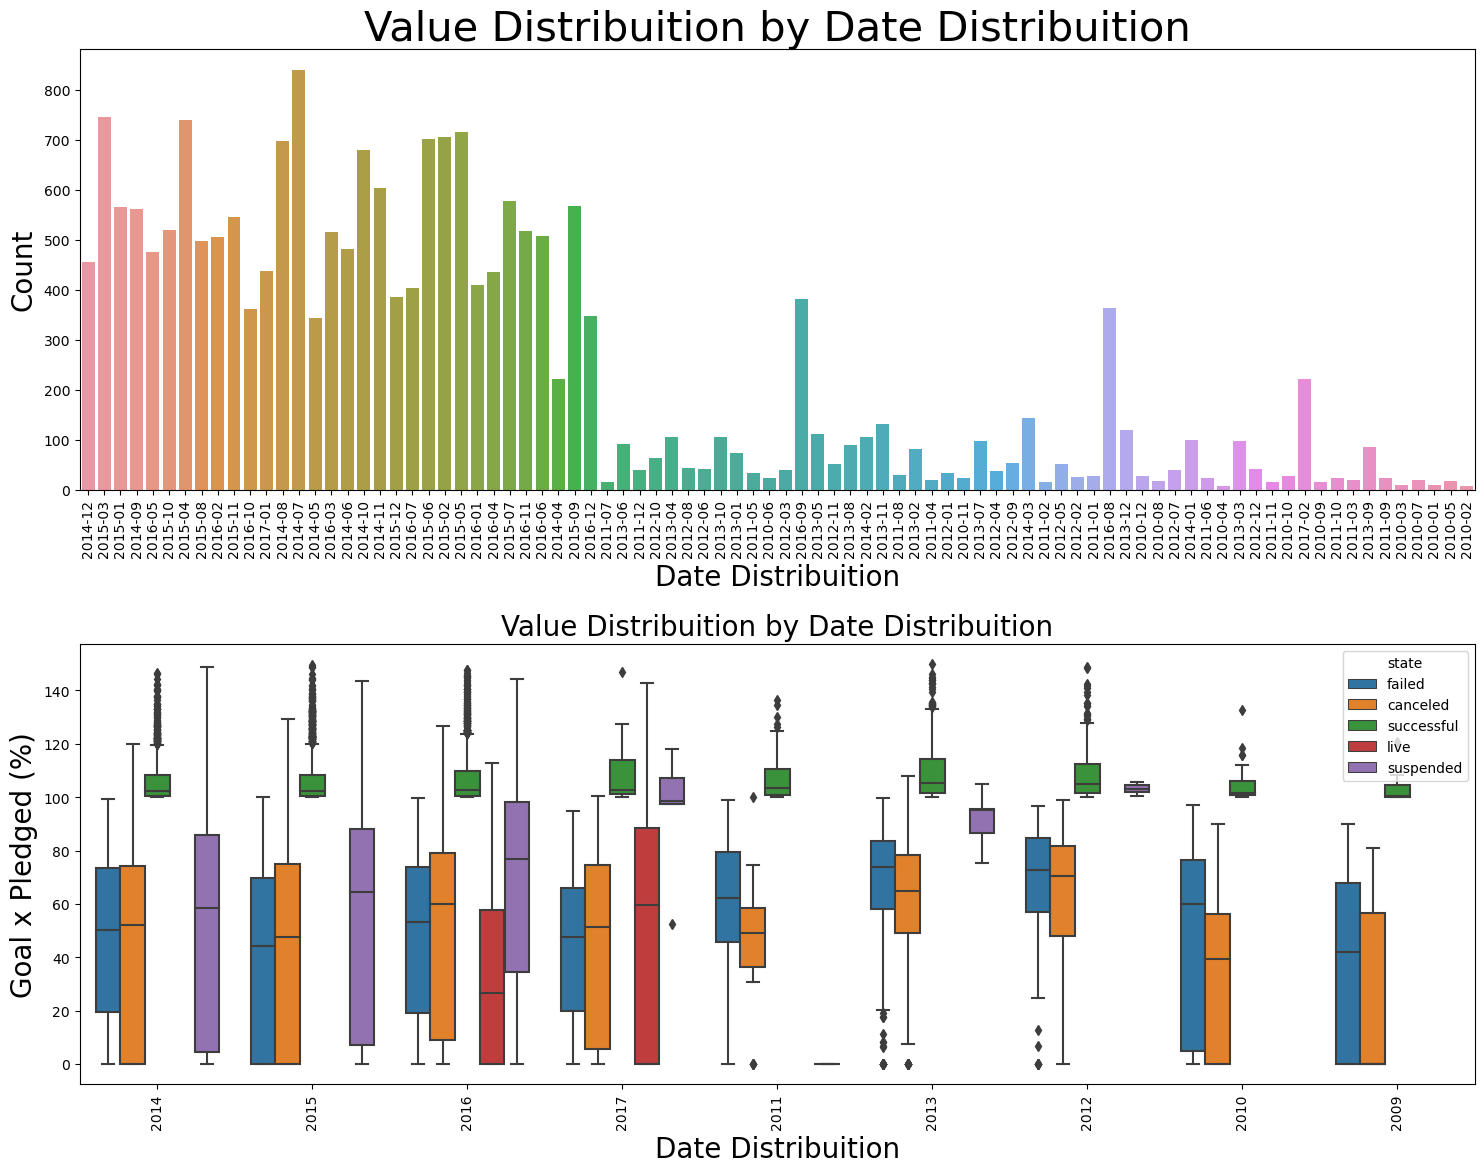

In [31]:
plt.figure(figsize = (18,15))

plt.subplots_adjust(hspace = 0.35, top = 0.8)

g1 = plt.subplot(211)
g1 = sns.countplot(x="laun_month_year", data=df[df['laun_month_year'] >= '2010-01'])
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("Value Distribuition by Date Distribuition", fontsize=30)
g1.set_xlabel("Date Distribuition", fontsize=20)
g1.set_ylabel("Count", fontsize=20)

g2 = plt.subplot(212)
g2 = sns.boxplot(x="laun_year", y="diff_pleded_goal",data=df[df['diff_pleded_goal'] < 150], hue="state")
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)
g2.set_title("Value Distribuition by Date Distribuition", fontsize=20)
g2.set_xlabel("Date Distribuition", fontsize=20)
g2.set_ylabel("Goal x Pledged (%)", fontsize=20)
plt.show()

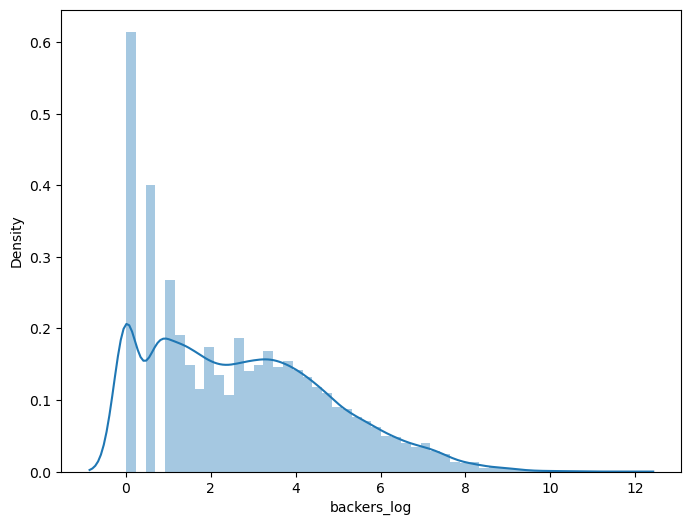

In [32]:
df['backers_log'] = np.log(df['backers_count'] + 1 ) 
#The + 1 is to normalize the zero or negative values

plt.figure(figsize = (8,6))
sns.distplot(df['backers_log'])

plt.show()
     

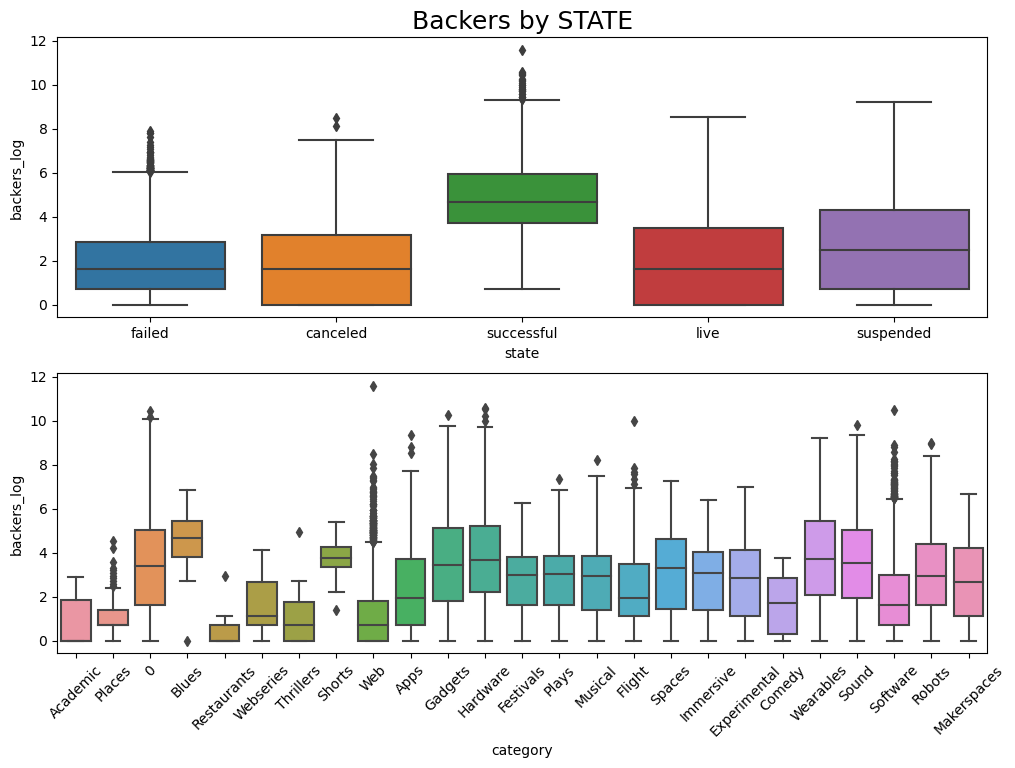

In [33]:
plt.figure(figsize = (12,8))

plt.subplot(211)
g = sns.boxplot(x='state',y='backers_log', data=df)
g.set_title("Backers by STATE", fontsize=18)

plt.subplot(212)
g = sns.boxplot(x='category',y='backers_log', data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

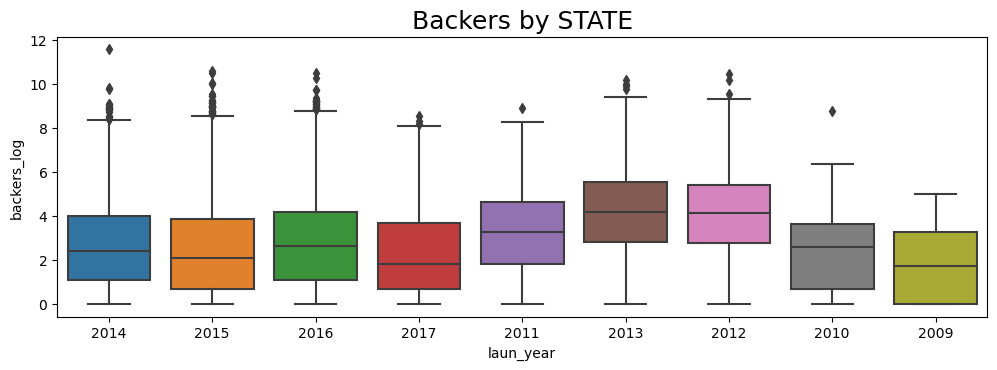

In [34]:
plt.figure(figsize = (12,8))

plt.subplot(211)
g = sns.boxplot(x='laun_year',y='backers_log',data=df)
g.set_title("Backers by STATE", fontsize=18)

plt.show()
     

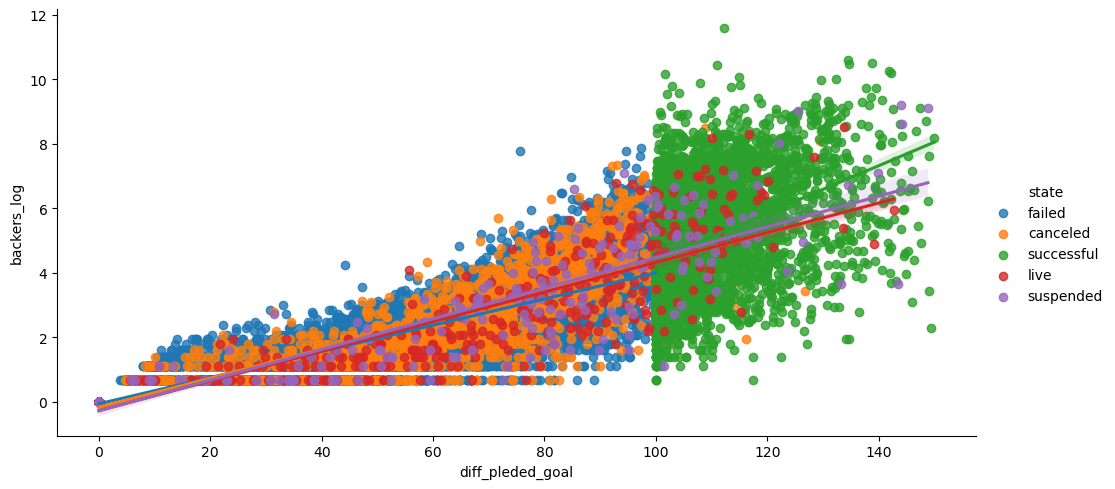

In [35]:
#Looking the relation of Backers and % of goal reached
sns.lmplot(x='diff_pleded_goal', y ='backers_log', data=df[df['diff_pleded_goal'] < 150], aspect = 2,hue='state')
plt.show()
     

In [36]:
df.head()


,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,...,launch_to_deadline,launch_to_state_change,pledge_log,goal_log,laun_month_year,laun_year,dead_month_year,dead_year,diff_pleded_goal,backers_log
0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,US,...,36 days 20:47:24.000000000,0,0.000000,7.313887,2014-12,2014,2015-01,2015,0.00,0.000000
1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,US,...,60 days 00:00:00.000000000,0,0.000000,6.216606,2015-03,2015,2015-05,2015,0.00,0.000000
2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,US,...,60 days 00:00:00.000000000,0,4.795791,11.512935,2015-01,2015,2015-03,2015,41.66,1.791759
3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,US,...,30 days 00:00:00.000000000,0,0.000000,8.517393,2014-09,2014,2014-10,2014,0.00,0.000000
4,1613604977,"{""small"":""https://ksr-ugc.imgix.net/assets/012...","Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,DE,...,32 days 06:02:33.000000000,0,5.877736,8.078068,2016-05,2016,2016-06,2016,72.76,2.890372


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 67 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        20632 non-null  int64         
 1   photo                     20632 non-null  object        
 2   name                      20632 non-null  object        
 3   blurb                     20632 non-null  object        
 4   goal                      20632 non-null  float64       
 5   pledged                   20632 non-null  float64       
 6   state                     20632 non-null  object        
 7   slug                      20632 non-null  object        
 8   disable_communication     20632 non-null  bool          
 9   country                   20632 non-null  object        
 10  currency                  20632 non-null  object        
 11  currency_symbol           20632 non-null  object        
 12  currency_trailing_

In [38]:
df['Dead_Dates'] = pd.to_datetime(df['deadline']).dt.date
df['Dead_Time'] = pd.to_datetime(df['deadline']).dt.time
df['dead_hour'] = pd.to_datetime(df['deadline']).dt.hour
df['dead_minute'] = pd.to_datetime(df['deadline']).dt.minute
df['dead_day'] = pd.to_datetime(df['deadline']).dt.day
df['dead_month'] = pd.to_datetime(df['deadline']).dt.month
df['dead_year'] = pd.to_datetime(df['deadline']).dt.year
     

In [39]:
df['launch_Dates'] = pd.to_datetime(df['launched_at']).dt.date
df['launch_Time'] = pd.to_datetime(df['launched_at']).dt.time
df['launch_hour'] = pd.to_datetime(df['launched_at']).dt.hour
df['launch_minute'] = pd.to_datetime(df['launched_at']).dt.minute
df['launch_day'] = pd.to_datetime(df['launched_at']).dt.day
df['launch_month'] = pd.to_datetime(df['launched_at']).dt.month
df['launch_year'] = pd.to_datetime(df['launched_at']).dt.year

In [40]:
df['deadline'] = df['deadline'].apply(pd.to_datetime)
df['launched'] = df['launched_at'].apply(pd.to_datetime)

df['duration'] = df['deadline'] - df['launched_at']
df['duration'] = df['duration'].dt.days
     

In [41]:
df['duration'] = df['duration']
     

In [42]:
df.drop(columns=["id","photo","blurb","slug","disable_communication","currency_symbol","creator","location","profile","spotlight","urls","source_url","friends","is_starred","is_backing","permissions","deadline","launched","pledge_log","goal_log","laun_month_year","laun_year","dead_month_year","diff_pleded_goal","backers_log","Dead_Dates","Dead_Time","launch_Dates","launch_Time"],inplace=True)


In [43]:
df.head()


,name,goal,pledged,state,country,currency,currency_trailing_code,state_changed_at,created_at,launched_at,...,dead_hour,dead_minute,dead_day,dead_month,launch_hour,launch_minute,launch_day,launch_month,launch_year,duration
0,Auntie Di's Music Time Sign ASL for Hearing an...,1500.0,0.0,failed,US,USD,True,1/23/2015 10:35,11/29/2014 22:55,2014-12-17 13:47:00,...,10,35,23,1,13,47,17,12,2014,36
1,Jump Start Kindergarten Toolkit,500.0,0.0,failed,US,USD,True,5/1/2015 16:13,2/20/2015 9:28,2015-03-02 16:13:00,...,16,13,1,5,16,13,2,3,2015,60
2,Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,100000.0,120.0,failed,US,USD,True,3/26/2015 8:17,1/24/2015 0:08,2015-01-25 08:17:00,...,8,17,26,3,8,17,25,1,2015,60
3,"MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",5000.0,0.0,failed,US,USD,True,10/6/2014 0:41,9/5/2014 22:30,2014-09-06 00:41:00,...,0,41,6,10,0,41,6,9,2014,30
4,"Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",3222.0,356.0,failed,DE,EUR,False,6/27/2016 12:00,5/25/2016 14:09,2016-05-26 05:57:00,...,12,0,27,6,5,57,26,5,2016,32


In [44]:
df=df.drop(['currency_trailing_code'],axis=1)


In [45]:
df=df.drop(['staff_pick'],axis=1)

In [46]:
df=df.drop(['state_changed_at','created_at','launched_at'],axis=1)

In [47]:
df=df.drop(['deadline_weekday','state_changed_at_weekday','created_at_weekday','launched_at_weekday'],axis=1)

In [48]:
df=df.drop(['create_to_launch','launch_to_deadline','launch_to_state_change'],axis=1)

In [49]:
df.head()

,name,goal,pledged,state,country,currency,backers_count,static_usd_rate,usd_pledged,category,...,dead_hour,dead_minute,dead_day,dead_month,launch_hour,launch_minute,launch_day,launch_month,launch_year,duration
0,Auntie Di's Music Time Sign ASL for Hearing an...,1500.0,0.0,failed,US,USD,0,1.000000,0.000000,Academic,...,10,35,23,1,13,47,17,12,2014,36
1,Jump Start Kindergarten Toolkit,500.0,0.0,failed,US,USD,0,1.000000,0.000000,Academic,...,16,13,1,5,16,13,2,3,2015,60
2,Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,100000.0,120.0,failed,US,USD,5,1.000000,120.000000,Academic,...,8,17,26,3,8,17,25,1,2015,60
3,"MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",5000.0,0.0,failed,US,USD,0,1.000000,0.000000,Academic,...,0,41,6,10,0,41,6,9,2014,30
4,"Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",3222.0,356.0,failed,DE,EUR,17,1.114613,396.802395,Academic,...,12,0,27,6,5,57,26,5,2016,32


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    20632 non-null  object 
 1   goal                    20632 non-null  float64
 2   pledged                 20632 non-null  float64
 3   state                   20632 non-null  object 
 4   country                 20632 non-null  object 
 5   currency                20632 non-null  object 
 6   backers_count           20632 non-null  int64  
 7   static_usd_rate         20632 non-null  float64
 8   usd_pledged             20632 non-null  float64
 9   category                20632 non-null  object 
 10  name_len                20632 non-null  float64
 11  name_len_clean          20632 non-null  float64
 12  blurb_len               20632 non-null  float64
 13  blurb_len_clean         20632 non-null  float64
 14  deadline_month          20632 non-null

In [51]:
df.describe()

,goal,pledged,backers_count,static_usd_rate,usd_pledged,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_month,...,dead_hour,dead_minute,dead_day,dead_month,launch_hour,launch_minute,launch_day,launch_month,launch_year,duration
count,2.063200e+04,2.063200e+04,20632.000000,20632.000000,2.063200e+04,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,...,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000
mean,9.410497e+04,2.139268e+04,183.675843,1.039363,2.091591e+04,5.939366,5.291295,18.986574,13.078034,6.707784,...,12.926473,26.942177,15.695134,6.707784,12.417168,28.328616,15.322363,6.541828,2014.752084,34.718592
std,1.335511e+06,1.204973e+05,1222.012658,0.230419,1.154717e+05,2.827289,2.419278,4.641233,3.289457,3.411420,...,6.037133,20.175689,9.027917,3.411420,5.574409,18.147939,8.800871,3.379879,1.261752,11.873116
min,1.000000e+00,0.000000e+00,0.000000,0.045641,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2009.000000,1.000000
25%,4.000000e+03,2.500000e+01,2.000000,1.000000,2.500000e+01,4.000000,3.000000,17.000000,11.000000,4.000000,...,9.000000,7.000000,8.000000,4.000000,9.000000,12.000000,8.000000,4.000000,2014.000000,30.000000
50%,1.400000e+04,6.950000e+02,12.000000,1.000000,7.163012e+02,6.000000,5.000000,20.000000,13.000000,7.000000,...,13.000000,26.000000,15.000000,7.000000,12.000000,28.000000,15.000000,7.000000,2015.000000,30.000000
75%,5.000000e+04,5.954250e+03,63.000000,1.000000,6.004628e+03,8.000000,7.000000,22.000000,15.000000,10.000000,...,17.000000,45.000000,23.000000,10.000000,16.000000,44.000000,23.000000,9.000000,2016.000000,40.000000
max,1.000000e+08,6.225355e+06,105857.000000,1.715913,6.225355e+06,16.000000,14.000000,35.000000,30.000000,12.000000,...,23.000000,59.000000,31.000000,12.000000,23.000000,59.000000,31.000000,12.000000,2017.000000,91.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    20632 non-null  object 
 1   goal                    20632 non-null  float64
 2   pledged                 20632 non-null  float64
 3   state                   20632 non-null  object 
 4   country                 20632 non-null  object 
 5   currency                20632 non-null  object 
 6   backers_count           20632 non-null  int64  
 7   static_usd_rate         20632 non-null  float64
 8   usd_pledged             20632 non-null  float64
 9   category                20632 non-null  object 
 10  name_len                20632 non-null  float64
 11  name_len_clean          20632 non-null  float64
 12  blurb_len               20632 non-null  float64
 13  blurb_len_clean         20632 non-null  float64
 14  deadline_month          20632 non-null

# Text Preprocessing


In [53]:
!pip install matplotlib-venn


In [54]:
!pip install stop-words


In [55]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [56]:
import nltk
nltk.download('stopwords')
import nltk.tokenize as word_tokenize
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize
from stop_words import get_stop_words


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Checkout\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


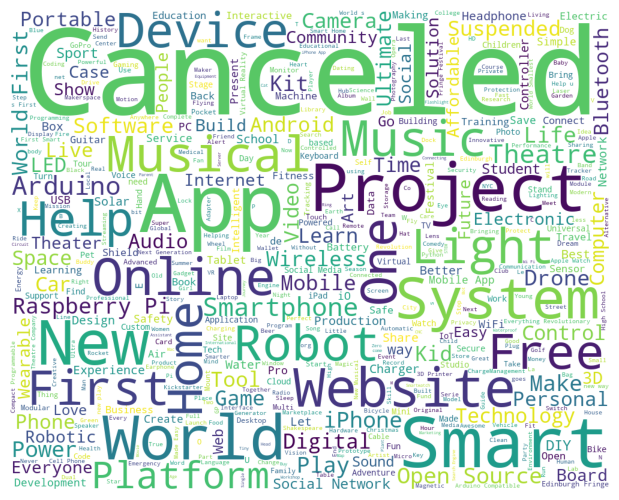

In [57]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=500,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df['name'].dropna().astype(str)))

print(wordcloud)
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [58]:
import nltk
nltk.download('punkt')
     

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Checkout\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
# convert sentance to word contain special characters.
def sentance_to_word(x):
    x=re.sub("[^A-Za-z0-9]"," ",x)
    words=nltk.word_tokenize(x)
    return words

# convert whole eassy to word list
def essay_to_word(essay):
    essay = essay.strip()
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw = tokenizer.tokenize(essay)
    final_words=[]
    for i in raw:
        if(len(i)>0):
            final_words.append(sentance_to_word(i))
    return final_words
        
# Calculate number of words in essay
def number_Of_Words(essay):
    count=0
    for i in essay_to_word(essay):
        count+=len(i)
    return count

# calculate number of character in essay
def number_Of_Char(essay):
    count=0
    for i in essay_to_word(essay):
        for j in i:
            count+=len(j)
    return count

# calculate average of words in essay
def avg_word_len(essay):
    return number_Of_Char(essay)/number_Of_Words(essay)

In [60]:
# update dataset by calculating char_count, word_count, avg_word_len
df = df.copy()
df['name_char_count'] = df['name'].apply(number_Of_Char)
df['name_word_count'] = df['name'].apply(number_Of_Words)
df['name_avg_word_len'] = df['name'].apply(avg_word_len)
df.head()

,name,goal,pledged,state,country,currency,backers_count,static_usd_rate,usd_pledged,category,...,dead_month,launch_hour,launch_minute,launch_day,launch_month,launch_year,duration,name_char_count,name_word_count,name_avg_word_len
0,Auntie Di's Music Time Sign ASL for Hearing an...,1500.0,0.0,failed,US,USD,0,1.000000,0.000000,Academic,...,1,13,47,17,12,2014,36,49,12,4.083333
1,Jump Start Kindergarten Toolkit,500.0,0.0,failed,US,USD,0,1.000000,0.000000,Academic,...,5,16,13,2,3,2015,60,28,4,7.000000
2,Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,100000.0,120.0,failed,US,USD,5,1.000000,120.000000,Academic,...,3,8,17,25,1,2015,60,44,10,4.400000
3,"MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",5000.0,0.0,failed,US,USD,0,1.000000,0.000000,Academic,...,10,0,41,6,9,2014,30,31,7,4.428571
4,"Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",3222.0,356.0,failed,DE,EUR,17,1.114613,396.802395,Academic,...,6,5,57,26,5,2016,32,41,9,4.555556


# Encoding


In [61]:
df= df.loc[df['state'].isin(['failed','successful','canceled','suspended','live'])]


In [62]:
target = {'failed': 0, 'successful': 1 , 'canceled': 0, 'live':0,'suspended':0 }
df['state'] = df['state'].map(target)
     

In [63]:
df['state'].value_counts()


0    14614
1     6018
Name: state, dtype: int64

In [64]:
#Mapping countries and replacing 'N,0"' according to currency
country = {'USD':'US', 'AUD':'AU', 'CAD':'CA', 'GBP':'GB', 'EUR':'DE', 'SEK':'SE', 'DKK':'DK', 'NZD':'NZ', 'NOK':'NO', 'CHF':'CH'}
invalid = df[df['country'] == 'N,0"']
invalid['country'] = invalid['currency'].map(country)

#Placing it in original data
invalid_country = invalid['country'].iloc[:].values
j=0
for i in invalid.index:
    df['country'].iloc[i] =invalid_country[j]
    j=j+1

In [65]:
df['category'] = df['category'].astype(str)
df['currency'] = df['currency'].astype(str)
df['country'] = df['country'].astype(str)


In [66]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df['category'] = labelencoder.fit_transform(df['category'])
df['currency'] = labelencoder.fit_transform(df['currency'])
df['country'] = labelencoder.fit_transform(df['country'])



In [67]:
df['category'] = df['category'].astype(float)
df['currency'] = df['currency'].astype(float)
df['country'] = df['country'].astype(float)
     

In [68]:
df.head(1)


,name,goal,pledged,state,country,currency,backers_count,static_usd_rate,usd_pledged,category,...,dead_month,launch_hour,launch_minute,launch_day,launch_month,launch_year,duration,name_char_count,name_word_count,name_avg_word_len
0,Auntie Di's Music Time Sign ASL for Hearing an...,1500.0,0.0,0,20.0,12.0,0,1.0,0.0,1.0,...,1,13,47,17,12,2014,36,49,12,4.083333


In [69]:
df.drop(columns=['name'],inplace=True)


In [70]:
df.head(1)


,goal,pledged,state,country,currency,backers_count,static_usd_rate,usd_pledged,category,name_len,...,dead_month,launch_hour,launch_minute,launch_day,launch_month,launch_year,duration,name_char_count,name_word_count,name_avg_word_len
0,1500.0,0.0,0,20.0,12.0,0,1.0,0.0,1.0,11.0,...,1,13,47,17,12,2014,36,49,12,4.083333


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20632 entries, 0 to 20631
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   goal                    20632 non-null  float64
 1   pledged                 20632 non-null  float64
 2   state                   20632 non-null  int64  
 3   country                 20632 non-null  float64
 4   currency                20632 non-null  float64
 5   backers_count           20632 non-null  int64  
 6   static_usd_rate         20632 non-null  float64
 7   usd_pledged             20632 non-null  float64
 8   category                20632 non-null  float64
 9   name_len                20632 non-null  float64
 10  name_len_clean          20632 non-null  float64
 11  blurb_len               20632 non-null  float64
 12  blurb_len_clean         20632 non-null  float64
 13  deadline_month          20632 non-null  int64  
 14  deadline_day            20632 non-null

# Model Selection and Evaluation

In [72]:
df.to_csv("final_preprocessed.csv")


In [73]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20632 entries, 0 to 20631
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   goal                    20632 non-null  float64
 1   pledged                 20632 non-null  float64
 2   state                   20632 non-null  int64  
 3   country                 20632 non-null  float64
 4   currency                20632 non-null  float64
 5   backers_count           20632 non-null  int64  
 6   static_usd_rate         20632 non-null  float64
 7   usd_pledged             20632 non-null  float64
 8   category                20632 non-null  float64
 9   name_len                20632 non-null  float64
 10  name_len_clean          20632 non-null  float64
 11  blurb_len               20632 non-null  float64
 12  blurb_len_clean         20632 non-null  float64
 13  deadline_month          20632 non-null  int64  
 14  deadline_day            20632 non-null

In [74]:
print(list(df.columns))

['goal', 'pledged', 'state', 'country', 'currency', 'backers_count', 'static_usd_rate', 'usd_pledged', 'category', 'name_len', 'name_len_clean', 'blurb_len', 'blurb_len_clean', 'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr', 'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr', 'created_at_month', 'created_at_day', 'created_at_yr', 'created_at_hr', 'launched_at_month', 'launched_at_day', 'launched_at_yr', 'launched_at_hr', 'dead_year', 'dead_hour', 'dead_minute', 'dead_day', 'dead_month', 'launch_hour', 'launch_minute', 'launch_day', 'launch_month', 'launch_year', 'duration', 'name_char_count', 'name_word_count', 'name_avg_word_len']


In [75]:
y = df['state'].values
X = df.drop(['state'],axis=1)



In [76]:
# Remove missing values from both X and y
X = X.dropna()
y = y[X.index]

In [77]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)
     

In [78]:
df.head(1)

,goal,pledged,state,country,currency,backers_count,static_usd_rate,usd_pledged,category,name_len,...,dead_month,launch_hour,launch_minute,launch_day,launch_month,launch_year,duration,name_char_count,name_word_count,name_avg_word_len
0,1500.0,0.0,0,20.0,12.0,0,1.0,0.0,1.0,11.0,...,1,13,47,17,12,2014,36,49,12,4.083333


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20632 entries, 0 to 20631
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   goal                    20632 non-null  float64
 1   pledged                 20632 non-null  float64
 2   state                   20632 non-null  int64  
 3   country                 20632 non-null  float64
 4   currency                20632 non-null  float64
 5   backers_count           20632 non-null  int64  
 6   static_usd_rate         20632 non-null  float64
 7   usd_pledged             20632 non-null  float64
 8   category                20632 non-null  float64
 9   name_len                20632 non-null  float64
 10  name_len_clean          20632 non-null  float64
 11  blurb_len               20632 non-null  float64
 12  blurb_len_clean         20632 non-null  float64
 13  deadline_month          20632 non-null  int64  
 14  deadline_day            20632 non-null

# Logistic Regression

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(penalty="l2")
logistic_reg.fit(X_train,y_train)
     

LogisticRegression()

In [81]:
y_train_pred = logistic_reg.predict(X_train)
y_test_pred = logistic_reg.predict(X_test)

d = pd.DataFrame({'Actual state': y_test, 'Predicted state': y_test_pred})
d.head(5)
     

,Actual state,Predicted state
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0


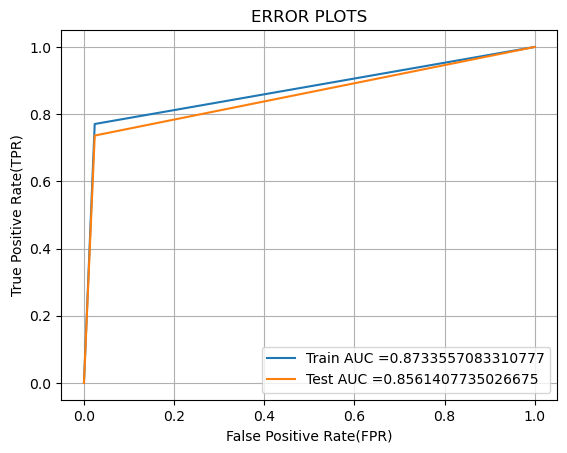

In [82]:
from sklearn.metrics import roc_curve,auc

train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_train, y_train_pred)
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr_tfidf, train_tpr_tfidf, label="Train AUC ="+str(auc(train_fpr_tfidf, train_tpr_tfidf)))
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label="Test AUC ="+str(auc(test_fpr_tfidf, test_tpr_tfidf)))

plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()
     

In [83]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
     

In [84]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds_tfidf, train_fpr_tfidf, train_tpr_tfidf)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
     

the maximum value of tpr*(1-fpr) 0.7521881889131762 for threshold 1
Train confusion matrix
[[9936  243]
 [ 978 3285]]
Test confusion matrix
[[4329  106]
 [ 463 1292]]


<AxesSubplot:>

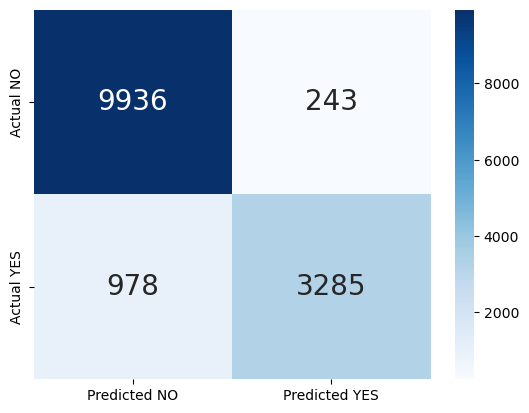

In [85]:
confusion_matrix_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
y_true = ['NO','YES']
y_pred = ['NO','YES']
confusion_matrix_train = pd.DataFrame(confusion_matrix_train, columns=np.unique(y_true), index = np.unique(y_true))
confusion_matrix_train.index = ['Actual NO', 'Actual YES']
confusion_matrix_train.columns = ['Predicted NO','Predicted YES']
sns.heatmap(confusion_matrix_train, annot=True,annot_kws={"size": 20},fmt="d",cmap='Blues')


<AxesSubplot:>

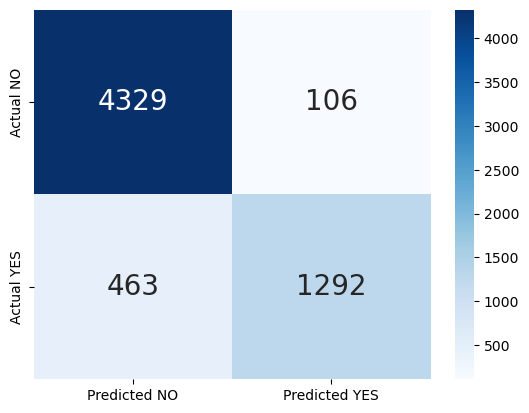

In [86]:
confusion_matrix_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
y_true = ['NO','YES']
y_pred = ['NO','YES']
confusion_matrix_test = pd.DataFrame(confusion_matrix_test, columns=np.unique(y_true), index = np.unique(y_true))
confusion_matrix_test.index = ['Actual NO', 'Actual YES']
confusion_matrix_test.columns = ['Predicted NO','Predicted YES']
sns.heatmap(confusion_matrix_test, annot=True,annot_kws={"size": 20},fmt="d",cmap='Blues')

In [87]:
from sklearn.metrics import precision_score
precision_score_train = precision_score(y_train, predict_with_best_t(y_train_pred, best_t))
print(print("Precision_Score of Train: ",precision_score_train))
     

Precision_Score of Train:  0.9311224489795918
None


In [88]:
from sklearn.metrics import recall_score
recall_score_train = recall_score(y_train, predict_with_best_t(y_train_pred, best_t))
print(print("Recall_Score of Train: ",recall_score_train))
     

Recall_Score of Train:  0.7705840957072484
None


In [89]:
from sklearn.metrics import f1_score
f1_score_train  = f1_score(y_train, predict_with_best_t(y_train_pred, best_t))
print("F1_Score of Train: ",f1_score_train)

F1_Score of Train:  0.8432807085098191


In [90]:
from sklearn.metrics import accuracy_score
auc_score_train_lr  = accuracy_score(y_train, predict_with_best_t(y_train_pred, best_t))
print("Accuracy_Score of Train: ",auc_score_train_lr)
     

Accuracy_Score of Train:  0.9154549231408392


In [91]:
from sklearn.metrics import accuracy_score
auc_score_test_lr  = accuracy_score(y_test, predict_with_best_t(y_test_pred, best_t))
print("Accuracy_Score of Test: ",auc_score_test_lr)

Accuracy_Score of Test:  0.9080775444264944


# Decision Tree

In [92]:
def batch_predict(clf, data):

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])

    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred
     


In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
 
min_samples_split=[5, 10, 100, 500]
max_depth=[1, 5, 10, 50]
train_auc = []
test_auc = []
for i in min_samples_split:
  for j in max_depth:
    print("min_samples_split = ", i ,'and max_depth = ',j)
    dt = DecisionTreeClassifier(min_samples_split=i, max_depth=j,class_weight='balanced')
    dt.fit(X_train, y_train)

    y_train_pred = batch_predict(dt, X_train)
    y_test_pred = batch_predict(dt, X_test)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    test_auc.append(roc_auc_score(y_test, y_test_pred))
     
print('='*100)
print('Train AUC : ',train_auc)
print('='*100)
print('Test AUC : ',test_auc)
print('='*100)

min_samples_split =  5 and max_depth =  1
min_samples_split =  5 and max_depth =  5
min_samples_split =  5 and max_depth =  10
min_samples_split =  5 and max_depth =  50
min_samples_split =  10 and max_depth =  1
min_samples_split =  10 and max_depth =  5
min_samples_split =  10 and max_depth =  10
min_samples_split =  10 and max_depth =  50
min_samples_split =  100 and max_depth =  1
min_samples_split =  100 and max_depth =  5
min_samples_split =  100 and max_depth =  10
min_samples_split =  100 and max_depth =  50
min_samples_split =  500 and max_depth =  1
min_samples_split =  500 and max_depth =  5
min_samples_split =  500 and max_depth =  10
min_samples_split =  500 and max_depth =  50
Train AUC :  [0.8314045924883363, 0.982632022154133, 0.9977288082151906, 0.9999900675400364, 0.8314045924883363, 0.982632022154133, 0.9976390358305312, 0.9999314637217361, 0.8314045924883363, 0.9824007640665814, 0.9960078539717292, 0.9979193224762558, 0.8314045924883363, 0.9805076164568831, 0.990532

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

min_samples_split=[5, 10, 100, 500]
max_depth= [1, 5, 10, 50]

dt=DecisionTreeClassifier(class_weight='balanced')
params={'max_depth': [1, 5, 10], 'min_samples_split':[5, 10, 100]}

cross_val=GridSearchCV(estimator=dt, param_grid=params, cv=3, scoring='roc_auc',return_train_score=True,verbose=2,n_jobs=-1)

cross_val.fit(X_train,y_train)
train_auc= cross_val.cv_results_['mean_train_score']
train_auc_std= cross_val.cv_results_['std_train_score']
test_auc = cross_val.cv_results_['mean_test_score'] 
test_auc_std= cross_val.cv_results_['std_test_score']

print('='*100)
print('The Best Parameters are : ',cross_val.best_params_)
print('='*100)
     

Fitting 3 folds for each of 9 candidates, totalling 27 fits
The Best Parameters are :  {'max_depth': 10, 'min_samples_split': 100}


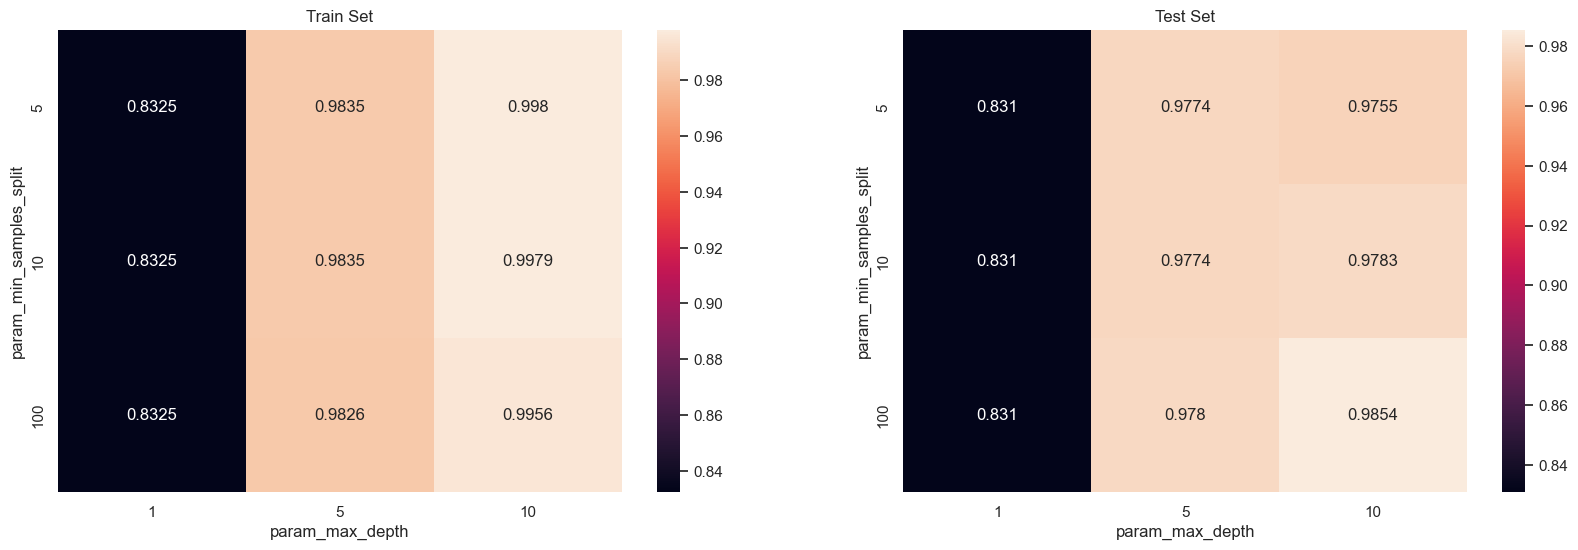

In [95]:
sns.set()
max_scores = pd.DataFrame(cross_val.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

In [96]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
print(cross_val.best_params_)
dt_best = cross_val.best_estimator_
dt_best.fit(X_train, y_train)

y_train_pred = batch_predict(dt_best, X_train)
y_test_pred = batch_predict(dt_best, X_test)

from sklearn.metrics import mean_squared_error as mse , r2_score
from math import sqrt
rms = sqrt(mse(y_test, y_test_pred))
score = r2_score(y_test, y_test_pred)

print(rms)
print(score)

xxx = pd.DataFrame({'Actual state': y_test, 'Predicted state': y_test_pred})
xxx.head(5)

{'max_depth': 10, 'min_samples_split': 100}
0.16161832348502433
0.8714145740485663


,Actual state,Predicted state
0,1,0.986479
1,0,0.000000
2,0,0.000000
3,0,0.000000
4,0,0.000000


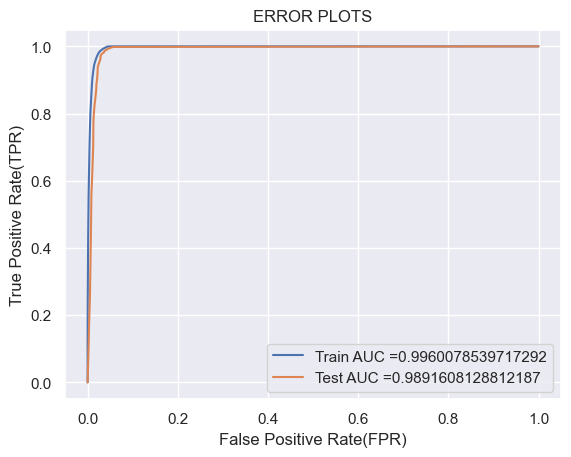

In [97]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_train, y_train_pred)
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr_tfidf, train_tpr_tfidf, label="Train AUC ="+str(auc(train_fpr_tfidf, train_tpr_tfidf)))
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label="Test AUC ="+str(auc(test_fpr_tfidf, test_tpr_tfidf)))

plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()
     

In [98]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
     

In [99]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds_tfidf, train_fpr_tfidf, train_tpr_tfidf)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
     

the maximum value of tpr*(1-fpr) 0.958855810109986 for threshold 0.537
Train confusion matrix
[[9869  310]
 [  47 4216]]
Test confusion matrix
[[4265  170]
 [  22 1733]]


<AxesSubplot:>

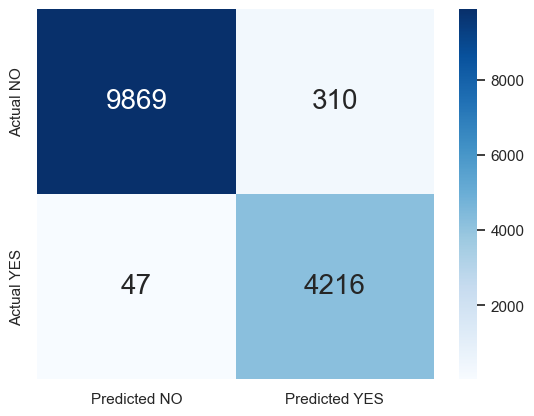

In [100]:
confusion_matrix_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
y_true = ['NO','YES']
y_pred = ['NO','YES']
confusion_matrix_train = pd.DataFrame(confusion_matrix_train, columns=np.unique(y_true), index = np.unique(y_true))
confusion_matrix_train.index = ['Actual NO', 'Actual YES']
confusion_matrix_train.columns = ['Predicted NO','Predicted YES']
sns.heatmap(confusion_matrix_train, annot=True,annot_kws={"size": 20},fmt="d",cmap='Blues')

<AxesSubplot:>

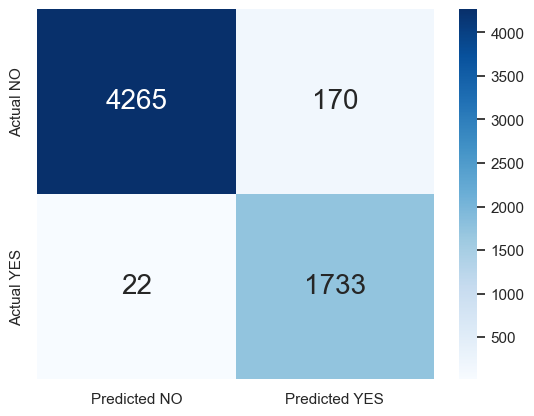

In [101]:

confusion_matrix_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
y_true = ['NO','YES']
y_pred = ['NO','YES']
confusion_matrix_test = pd.DataFrame(confusion_matrix_test, columns=np.unique(y_true), index = np.unique(y_true))
confusion_matrix_test.index = ['Actual NO', 'Actual YES']
confusion_matrix_test.columns = ['Predicted NO','Predicted YES']
sns.heatmap(confusion_matrix_test, annot=True,annot_kws={"size": 20},fmt="d",cmap='Blues')

In [102]:
from sklearn.metrics import precision_score
precision_score_train = precision_score(y_train, predict_with_best_t(y_train_pred, best_t))
print(print("Precision_Score of Train: ",precision_score_train))
     

Precision_Score of Train:  0.9315068493150684
None


In [103]:
from sklearn.metrics import recall_score
recall_score_train = recall_score(y_train, predict_with_best_t(y_train_pred, best_t))
print(print("Recall_Score of Train: ",recall_score_train))
     

Recall_Score of Train:  0.9889749003049496
None


In [104]:
from sklearn.metrics import f1_score
f1_score_train  = f1_score(y_train, predict_with_best_t(y_train_pred, best_t))
print("F1_Score of Train: ",f1_score_train)

F1_Score of Train:  0.9593810444874274


In [105]:
from sklearn.metrics import accuracy_score
auc_score_train_dt  = accuracy_score(y_train, predict_with_best_t(y_train_pred, best_t))
print("Accuracy_Score of Train: ",auc_score_train_dt)
     

Accuracy_Score of Train:  0.9752804320731201


In [106]:
from sklearn.metrics import accuracy_score
auc_score_test_dt  = accuracy_score(y_test, predict_with_best_t(y_test_pred, best_t))
print("Accuracy_Score of Test: ",auc_score_test_dt)

Accuracy_Score of Test:  0.9689822294022618


#  Gradient Boosting Decision Tree


In [107]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

max_depth= [1, 2, 3]
learning_rate=[0.001,0.01,1]

gbdt=GradientBoostingClassifier()
params={'max_depth': [1, 2, 3], 'learning_rate':[0.001,0.01,1]}

grid=GridSearchCV(estimator=gbdt, param_grid=params, cv=3, scoring='roc_auc',return_train_score=True,verbose=2,n_jobs=-1)

grid.fit(X_train,y_train)
train_auc= grid.cv_results_['mean_train_score']
train_auc_std= grid.cv_results_['std_train_score']
test_auc = grid.cv_results_['mean_test_score'] 
test_auc_std= grid.cv_results_['std_test_score']

print('='*100)
print('The Best Parameters are : ',grid.best_params_)
print('='*100)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
The Best Parameters are :  {'learning_rate': 1, 'max_depth': 1}


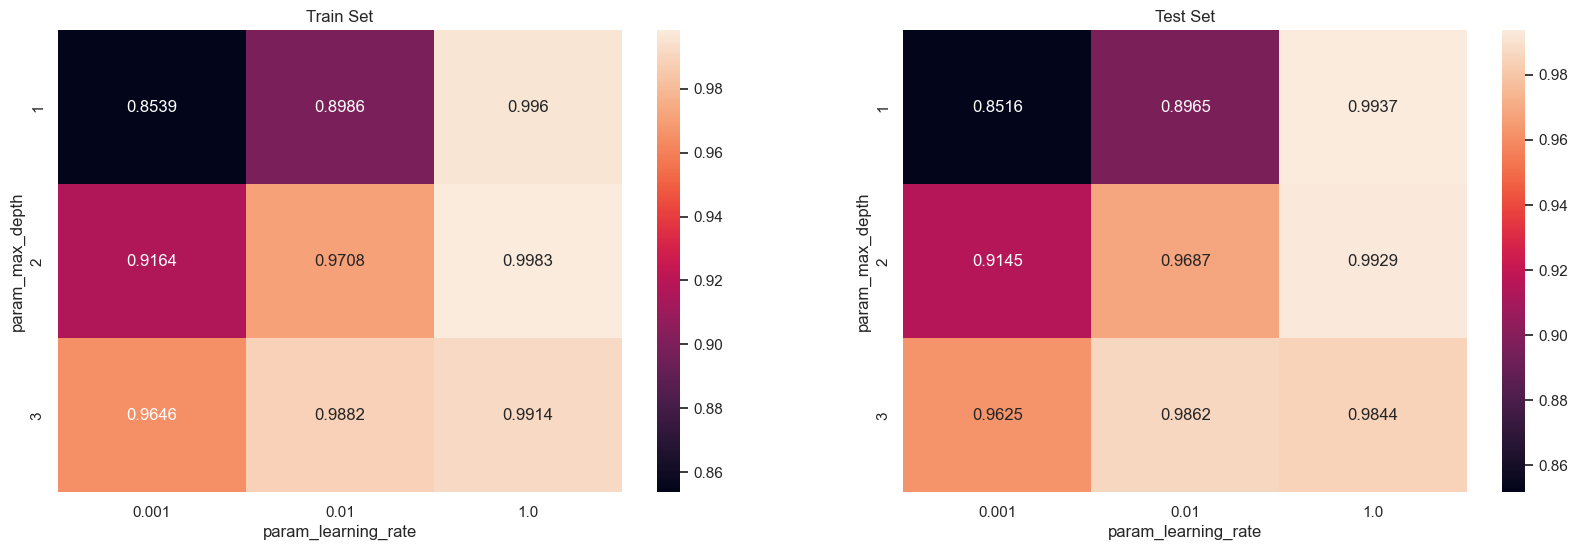

In [108]:
sns.set()
max_scores = pd.DataFrame(grid.cv_results_).groupby(['param_max_depth', 'param_learning_rate']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()
     


In [109]:
gbdt_best = grid.best_estimator_
gbdt_best.fit(X_train, y_train)

y_train_pred = batch_predict(gbdt_best, X_train)
y_test_pred = batch_predict(gbdt_best, X_test)

from sklearn.metrics import mean_squared_error as mse , r2_score
from math import sqrt
rms = sqrt(mse(y_test, y_test_pred))
score = r2_score(y_test, y_test_pred)

print(rms)
print(score)

xxx = pd.DataFrame({'Actual state': y_test, 'Predicted state': y_test_pred})
xxx.head(5)
     

0.1436930233951286
0.8983559599826247


,Actual state,Predicted state
0,1,8.536094e-01
1,0,2.361629e-07
2,0,3.258095e-07
3,0,1.884371e-03
4,0,1.646978e-09


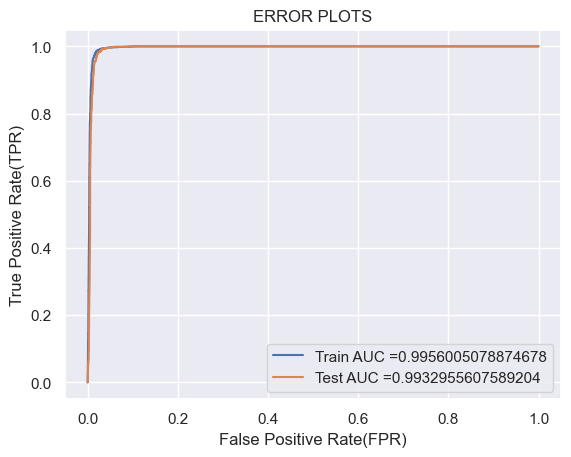

In [110]:
train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_train, y_train_pred)
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr_tfidf, train_tpr_tfidf, label="Train AUC ="+str(auc(train_fpr_tfidf, train_tpr_tfidf)))
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label="Test AUC ="+str(auc(test_fpr_tfidf, test_tpr_tfidf)))

plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [111]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds_tfidf, train_fpr_tfidf, train_tpr_tfidf)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.9665849693028221 for threshold 0.496
Train confusion matrix
[[9958  221]
 [  51 4212]]
Test confusion matrix
[[4336   99]
 [  37 1718]]


<AxesSubplot:>

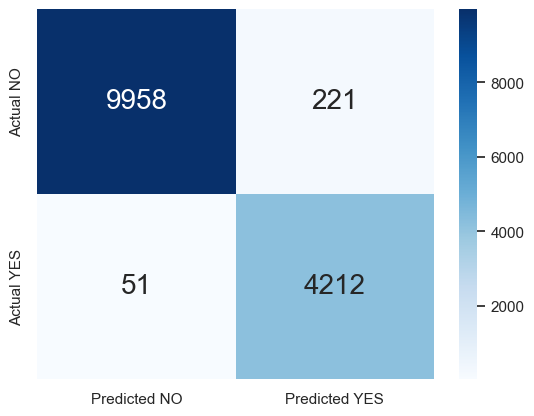

In [112]:
confusion_matrix_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
y_true = ['NO','YES']
y_pred = ['NO','YES']
confusion_matrix_train = pd.DataFrame(confusion_matrix_train, columns=np.unique(y_true), index = np.unique(y_true))
confusion_matrix_train.index = ['Actual NO', 'Actual YES']
confusion_matrix_train.columns = ['Predicted NO','Predicted YES']
sns.heatmap(confusion_matrix_train, annot=True,annot_kws={"size": 20},fmt="d",cmap='Blues')

<AxesSubplot:>

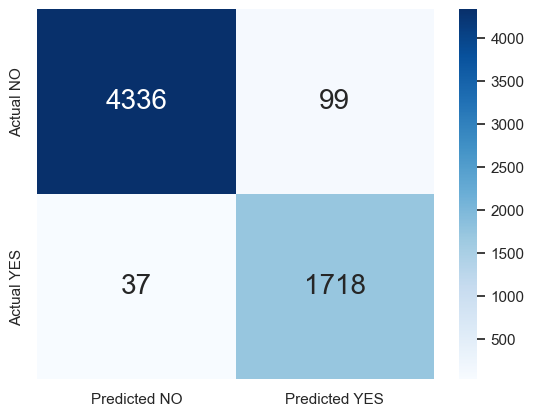

In [113]:

confusion_matrix_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
y_true = ['NO','YES']
y_pred = ['NO','YES']
confusion_matrix_test = pd.DataFrame(confusion_matrix_test, columns=np.unique(y_true), index = np.unique(y_true))
confusion_matrix_test.index = ['Actual NO', 'Actual YES']
confusion_matrix_test.columns = ['Predicted NO','Predicted YES']
sns.heatmap(confusion_matrix_test, annot=True,annot_kws={"size": 20},fmt="d",cmap='Blues')

In [114]:
from sklearn.metrics import precision_score
precision_score_train = precision_score(y_train, predict_with_best_t(y_train_pred, best_t))
print(print("Precision_Score of Train: ",precision_score_train))
     

Precision_Score of Train:  0.9501466275659824
None


In [115]:
from sklearn.metrics import recall_score
recall_score_train = recall_score(y_train, predict_with_best_t(y_train_pred, best_t))
print(print("Recall_Score of Train: ",recall_score_train))
     

Recall_Score of Train:  0.988036593947924
None


In [116]:
from sklearn.metrics import f1_score
f1_score_train  = f1_score(y_train, predict_with_best_t(y_train_pred, best_t))
print("F1_Score of Train: ",f1_score_train)

F1_Score of Train:  0.968721251149954


In [117]:
from sklearn.metrics import accuracy_score
auc_score_train_gbdt  = accuracy_score(y_train, predict_with_best_t(y_train_pred, best_t))
print("Accuracy_Score of Train: ",auc_score_train_gbdt)
     

Accuracy_Score of Train:  0.9811660434842819


In [118]:
from sklearn.metrics import accuracy_score
auc_score_test_gbdt  = accuracy_score(y_test, predict_with_best_t(y_test_pred, best_t))
print("Accuracy_Score of Test: ",auc_score_test_gbdt)

Accuracy_Score of Test:  0.9780290791599354


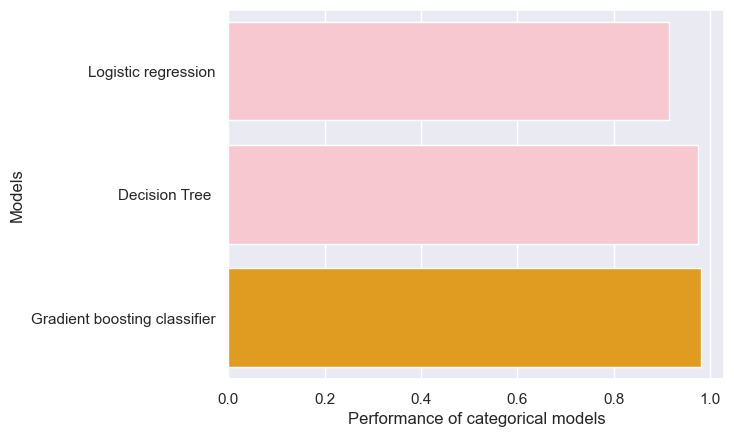

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the data
my_data = pd.DataFrame({
    'cat': ['Logistic regression', 'Decision Tree ', 'Gradient boosting classifier'], 
    'val': [auc_score_train_lr, auc_score_train_dt, auc_score_train_gbdt],
    'color': ['#FFC0CB', '#FFC0CB', '#FFA500']
})

# Create the barplot
ax = sns.barplot(x='val', y='cat', data=my_data, palette=my_data['color'])

# Set the axis labels
ax.set(xlabel='Performance of categorical models', ylabel='Models')

# Show the plot
plt.show()
